
# **Limpieza de datos (Base)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
base = pd.read_csv("Base.csv")
base.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.3               0.986506                         -1   
1           0     0.8               0.617426                         -1   
2           0     0.8               0.996707                          9   
3           0     0.6               0.475100                         11   
4           0     0.9               0.842307                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            25            40            0.006735   
1                            89            20            0.010095   
2                            14            40            0.012316   
3                            14            30            0.006991   
4                            29            40            5.742626   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0              102.453711           AA          1059  ...                0   
1               -0.849551           AD          1658  ...                0   
2               -1.490386           AB          1095  ...                0   
3               -1.863101           AB          3483  ...                0   
4               47.152498           AA          2339  ...                0   

   proposed_credit_limit  foreign_request    source  \
0                 1500.0                0  INTERNET   
1                 1500.0                0  INTERNET   
2                  200.0                0  INTERNET   
3                  200.0                0  INTERNET   
4                  200.0                0  INTERNET   

   session_length_in_minutes device_os  keep_alive_session  \
0                  16.224843     linux                   1   
1                   3.363854     other                   1   
2                  22.730559   windows                   0   
3                  15.215816     linux                   1   
4                   3.743048     other                   0   

   device_distinct_emails_8w device_fraud_count  month  
0                          1                  0      0  
1                          1                  0      0  
2                          1                  0      0  
3                          1                  0      0  
4                          1                  0      0  

[5 rows x 32 columns]

In [2]:
base.shape

(1000000, 32)

In [3]:
print(base.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [4]:
# Número total de duplicados (filas idénticas en todas las columnas)
print("Duplicados:", base.duplicated().sum())

Duplicados: 0


In [5]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [6]:
cat_cols = [
    "fraud_bool",
    "payment_type",
    "employment_status",
    "email_is_free",
    "housing_status",
    "phone_home_valid",
    "phone_mobile_valid",
    "has_other_cards",
    "foreign_request",
    "source",
    "device_os",
    "keep_alive_session",
    "device_fraud_count"
]
num_cols = [
    "income",
    "name_email_similarity",
    "prev_address_months_count",
    "current_address_months_count",
    "customer_age",
    "days_since_request",
    "intended_balcon_amount",
    "zip_count_4w",
    "velocity_6h",
    "velocity_24h",
    "velocity_4w",
    "bank_branch_count_8w",
    "date_of_birth_distinct_emails_4w",
    "credit_risk_score",
    "bank_months_count",
    "proposed_credit_limit",
    "session_length_in_minutes",
    "device_distinct_emails_8w",
    "month"
]

## Conversión de valores nulos
**Detectar:** Revisar qué columnas tienen valores nulos y cuántos.
**credit_risk_score:** es la unica variable con valores negativos válidos, segun la documentación.

***Rangos oficiales de las variables numéricas*** (*segun la documentación)*
* income: [0.1, 0.9]
* name_email_similarity: [0, 1]
* prev_address_months_count: [−1, 380] (−1 = missing)
* current_address_months_count: [−1, 429] (−1 = missing)
* customer_age: [10, 90]
* days_since_request: [0, 79]
* intended_balcon_amount: [−16, 114] (valores negativos = missing)
* zip_count_4w: [1, 6830]
* velocity_6h: [−175, 16818] (negativos = missing)
* velocity_24h: [1297, 9586]
* velocity_4w: [2825, 7020]
* bank_branch_count_8w: [0, 2404]
* date_of_birth_distinct_emails_4w: [0, 39]
* credit_risk_score: [−191, 389] (negativos son válidos aquí)
* bank_months_count: [−1, 32] (−1 = missing)
* proposed_credit_limit: [200, 2000]
* session_length_in_minutes: [−1, 107] (−1 = missing)
* device_distinct_emails_8w: [−1, 2] (−1 = missing)
* month: [0, 7]

In [7]:
(base == -1).sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [14]:
import numpy as np

# rangos válidos por variable numérica
ranges = {
    "income": (0.1, 0.9),
    "name_email_similarity": (0, 1),
    "prev_address_months_count": (0, 380),   # -1 = missing
    "current_address_months_count": (0, 429), # -1 = missing
    "customer_age": (10, 90),
    "days_since_request": (0, 79),
    "intended_balcon_amount": (0, 114),    # <0 = missing
    "zip_count_4w": (1, 6830),
    "velocity_6h": (0, 16818),            # <0 = missing
    "velocity_24h": (1297, 9586),
    "velocity_4w": (2825, 7020),
    "bank_branch_count_8w": (0, 2404),
    "date_of_birth_distinct_emails_4w": (0, 39),
    "credit_risk_score": (0, 389),        # negativos válidos
    "bank_months_count": (0, 32),           # -1 = missing
    "proposed_credit_limit": (200, 2000),
    "session_length_in_minutes": (0, 107),  # -1 = missing
    "device_distinct_emails_8w": (0, 2),    # -1 = missing
    "month": (0, 7)
}

In [15]:
# Convertir valores fuera de rango en NaN
for col, (low, high) in ranges.items():
    if col in base.columns:
        base.loc[(base[col] < low) | (base[col] > high), col] = np.nan

print("Valores fuera de rango reemplazados por NaN")


Valores fuera de rango reemplazados por NaN


In [10]:
# Contar negativos por columna
negativos = (base[num_cols] < 0).sum()

print(negativos)

income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
month                               0
dtype: int64


## Detección y corrección de outliers
**Detectar:**

**Métodos:** IQR (percentiles 25–75) o visualización (boxplots).

Las gráficas muestran la distribución de cada variable numérica y el boxplot. En ambas gráficas se marcan los outliers para identificar qué variables tienen outliers.


In [27]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

# 1. Filtrar solo no-fraude
base_no_fraud = base[base['fraud_bool'] == 0].copy()

# 2. Detectar columnas numéricas directamente en base_no_fraud
num_cols_nf = [c for c in base_no_fraud.columns if is_numeric_dtype(base_no_fraud[c])]

# 3. Quitar binarias (0/1) y target de esa lista
cols_to_check = []
for c in num_cols_nf:
    vals = base_no_fraud[c].dropna().unique()
    if not set(vals).issubset({0, 1}):  # descartar binarias
        cols_to_check.append(c)

print("Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):")
print(cols_to_check)

Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):
['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w', 'month']


In [28]:
# Crear una gráfica por variable

def outliers_detection(df, numeric_vars):
    cols_with_outliers = []

    for col in numeric_vars:
        if col not in df.columns:
            continue

        data = df[col].dropna()

        # Calcular IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detectar outliers
        outliers = data[(data < lower_bound) | (data > upper_bound)]

        # Guardar columna si tiene outliers
        if len(outliers) > 0:
            cols_with_outliers.append(col)

        # Crear figura
        plt.figure(figsize=(12, 5))

        # Histograma con outliers resaltados
        plt.subplot(1, 2, 1)
        sns.histplot(data, kde=True, bins=30, color="skyblue")
        plt.scatter(outliers, [0]*len(outliers), color="red", label="Outliers", zorder=5)
        plt.title(f"Distribución de {col}")
        plt.legend()

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data, color="lightgreen")
        plt.title(f"Boxplot de {col}")

        plt.tight_layout()
        plt.show()

    return cols_with_outliers

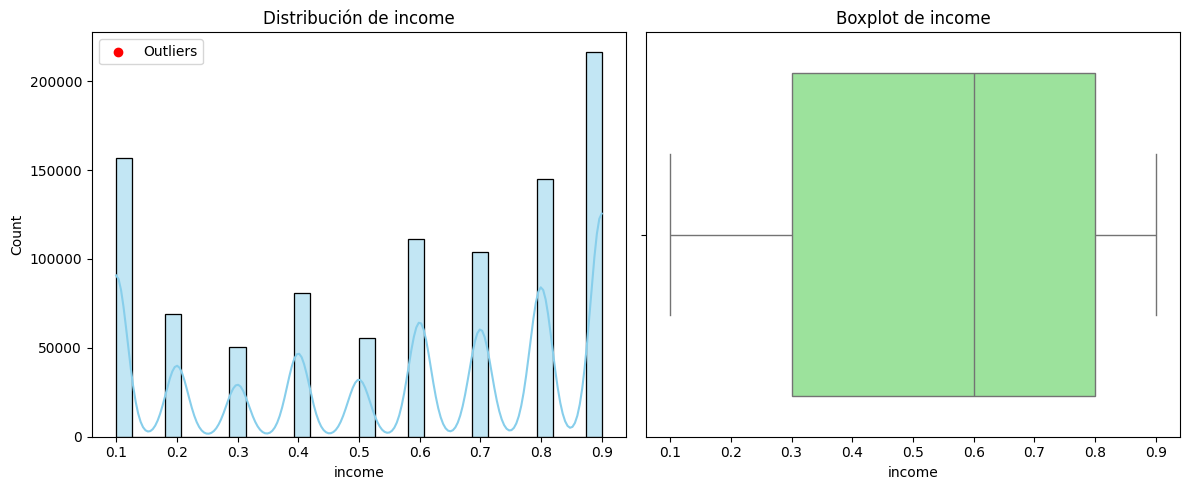

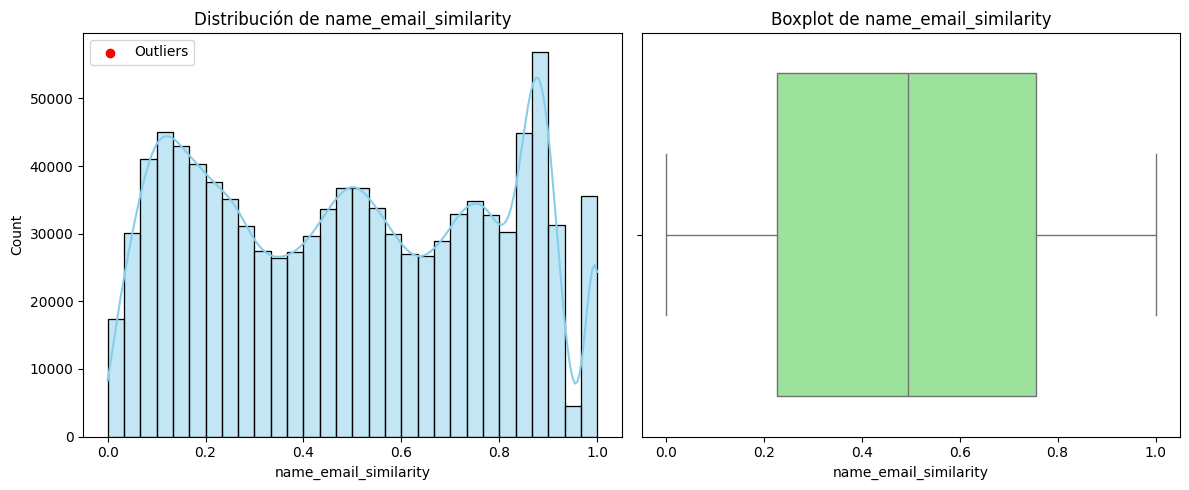

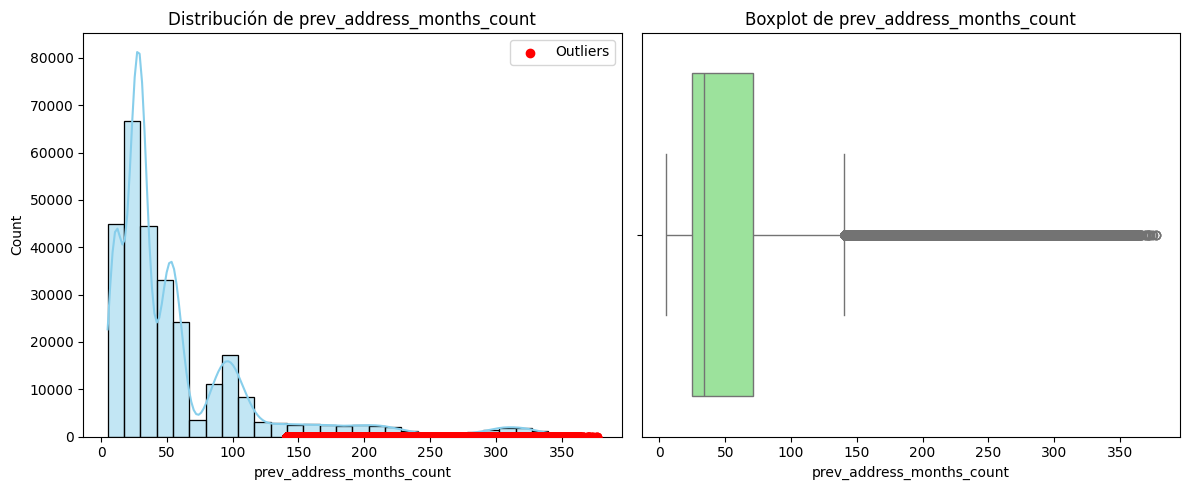

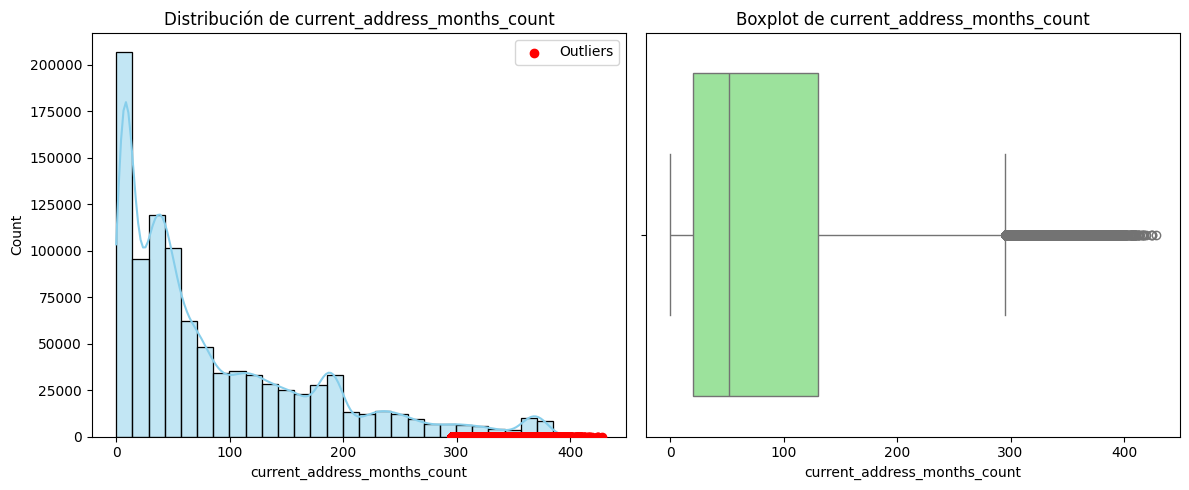

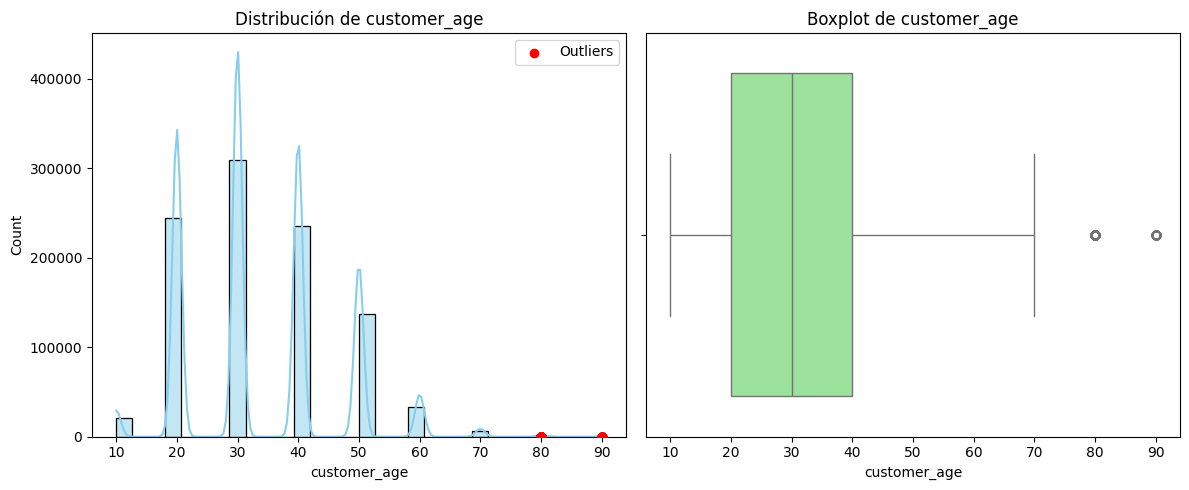

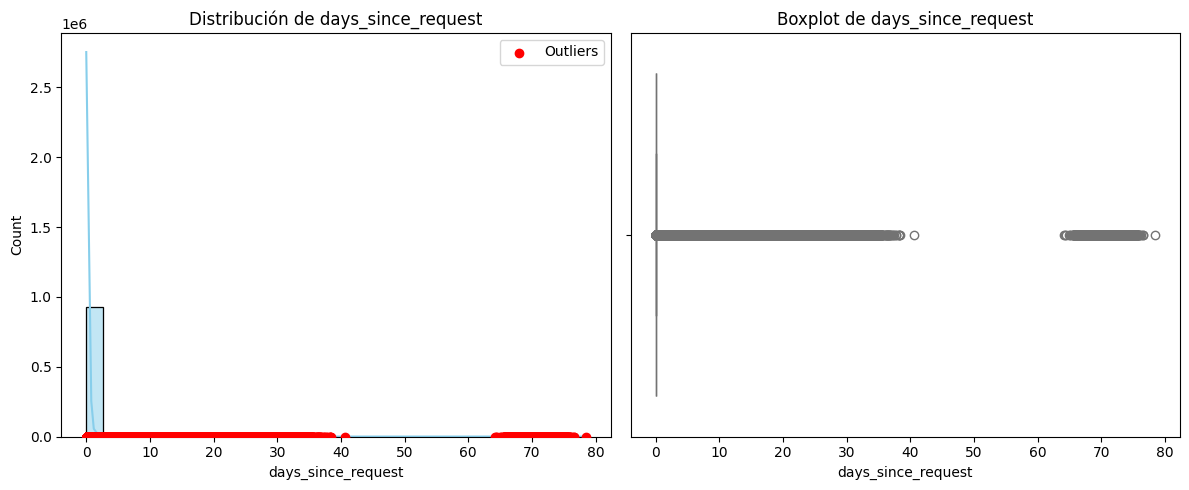

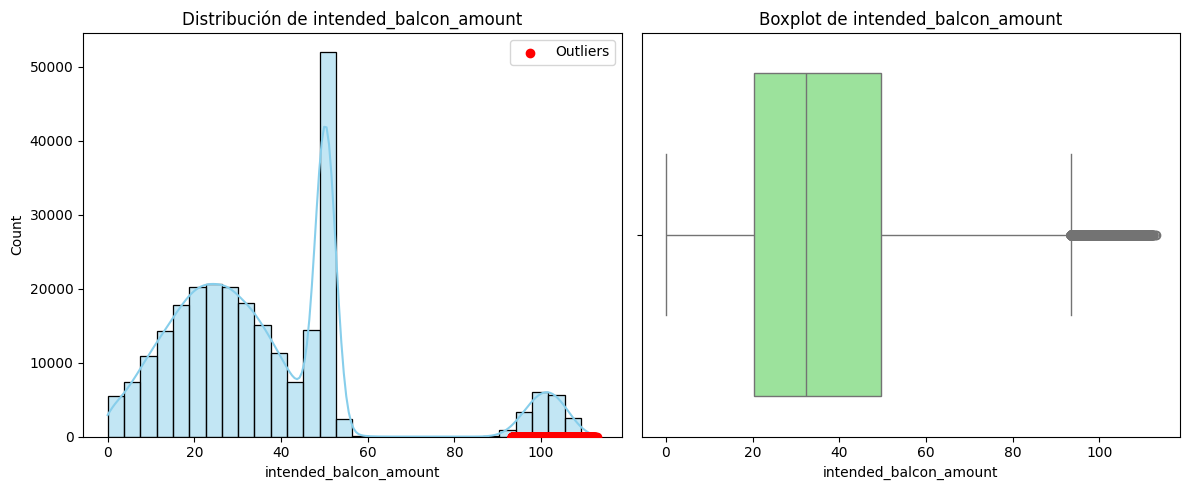

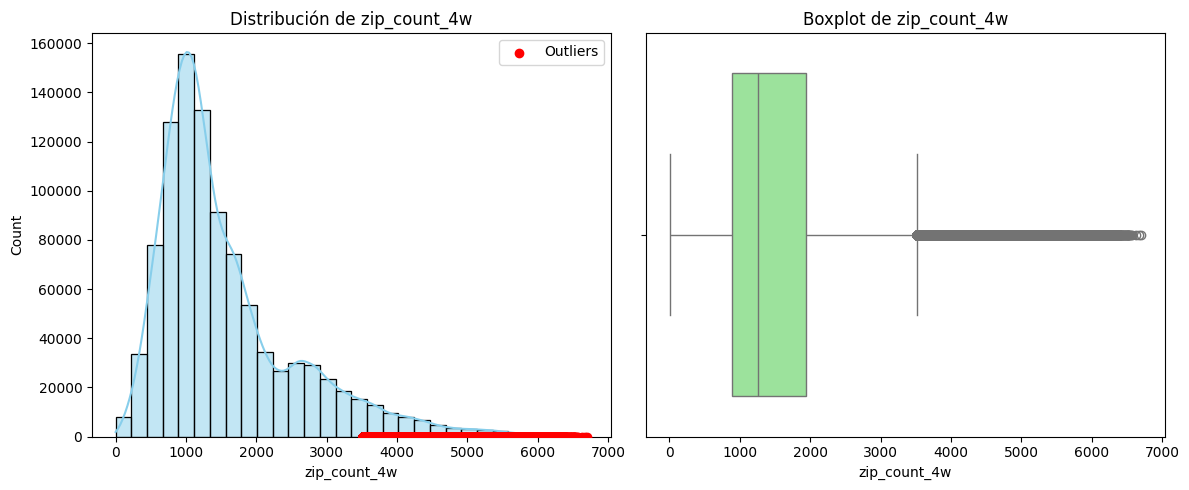

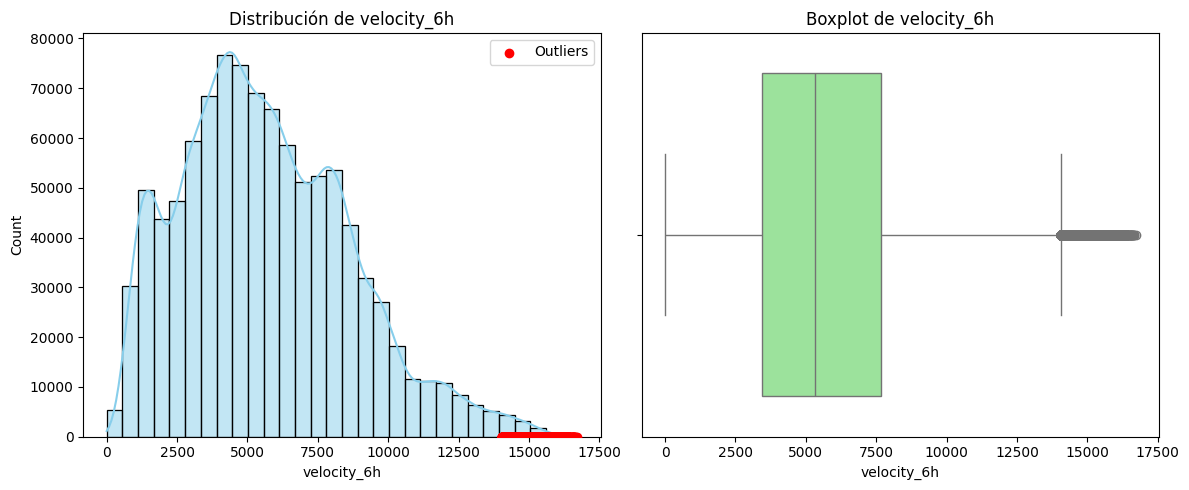

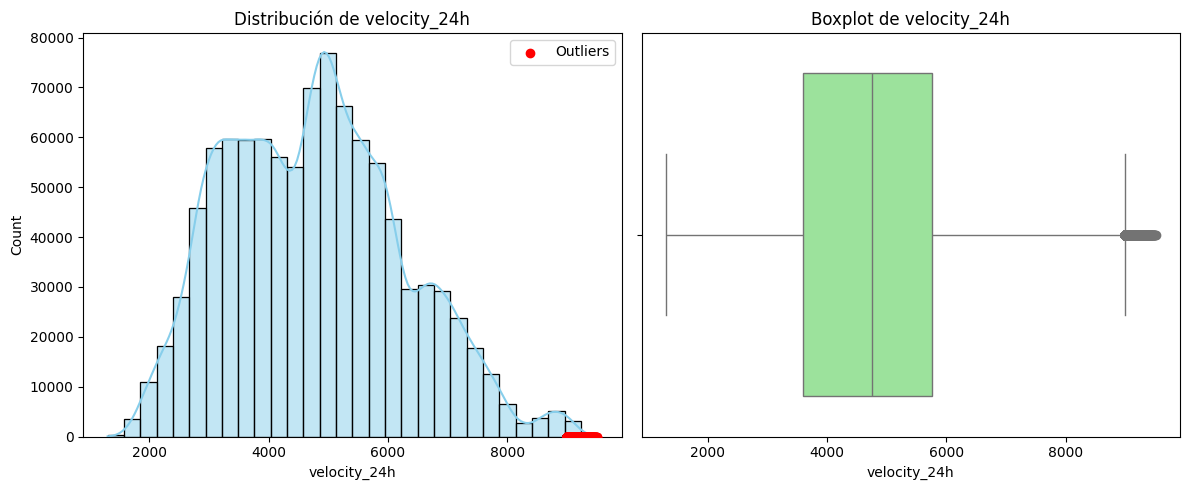

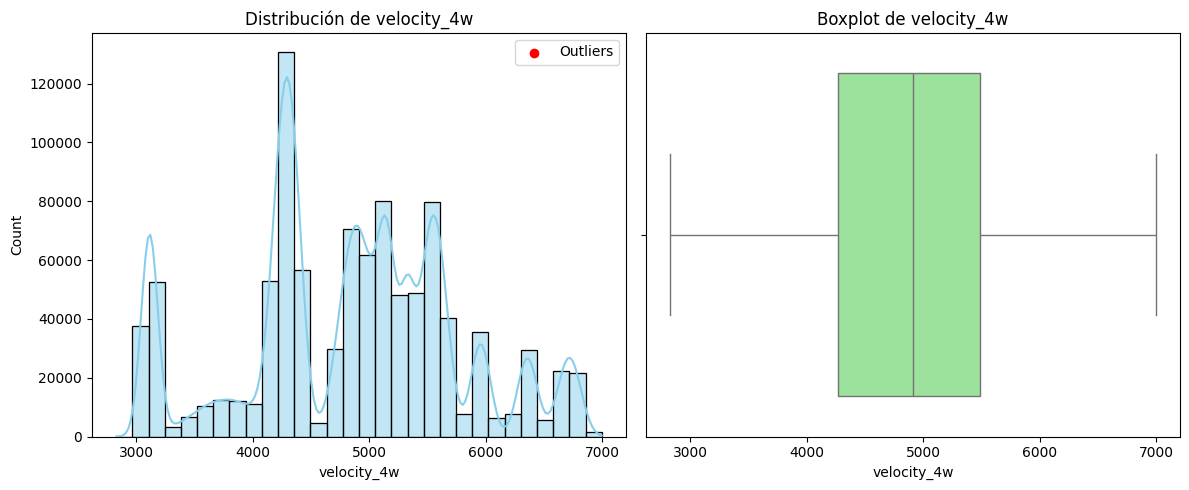

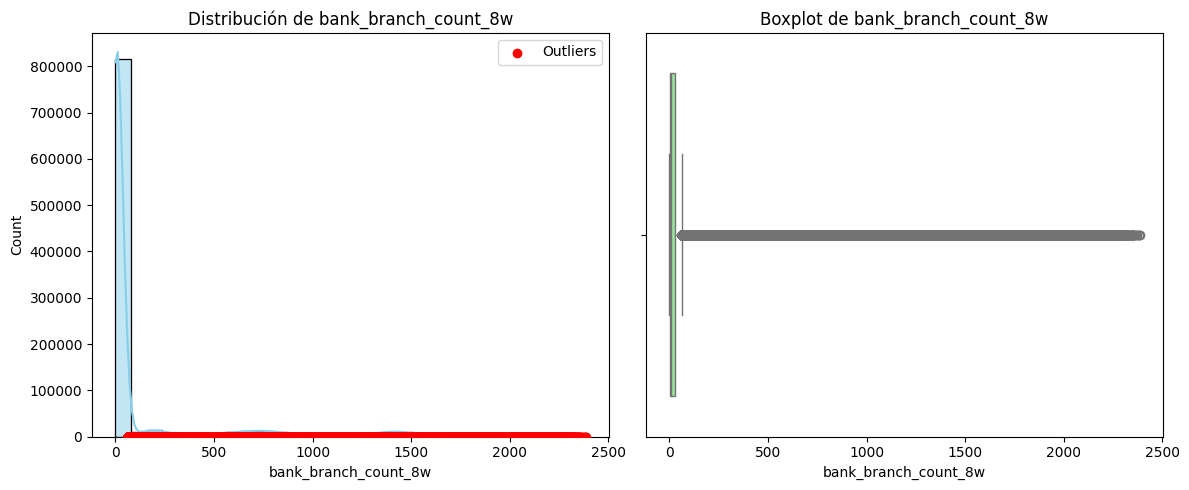

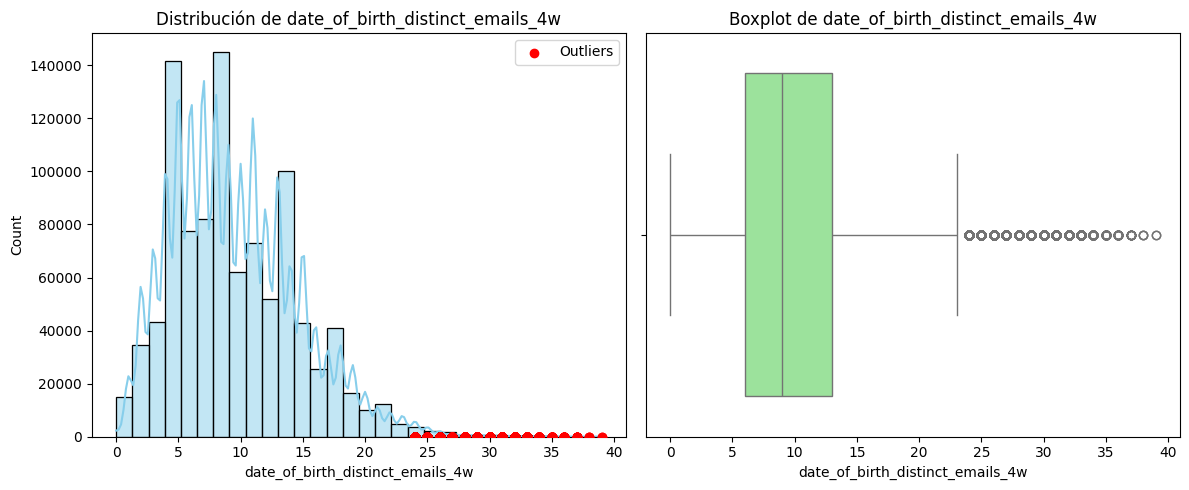

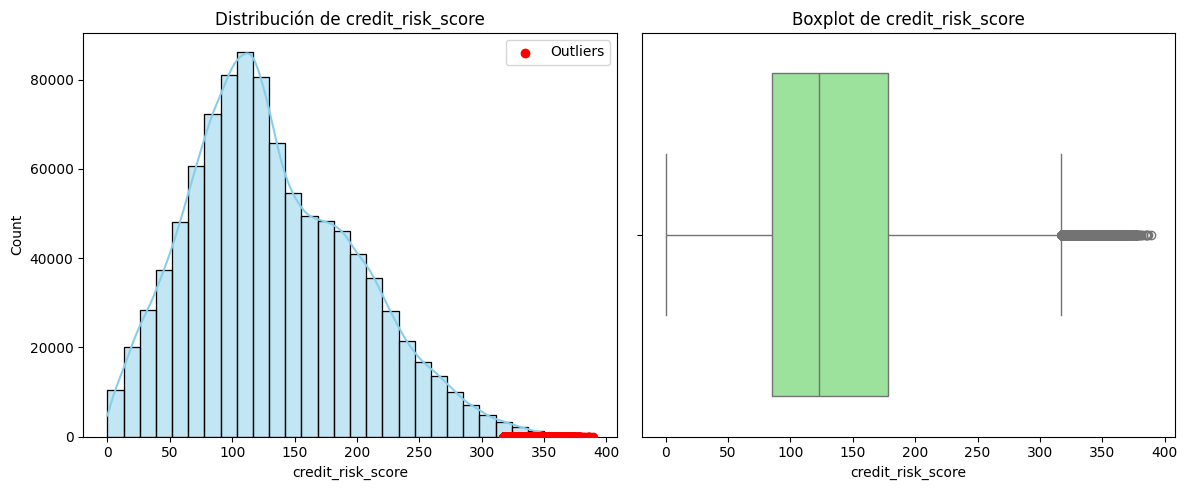

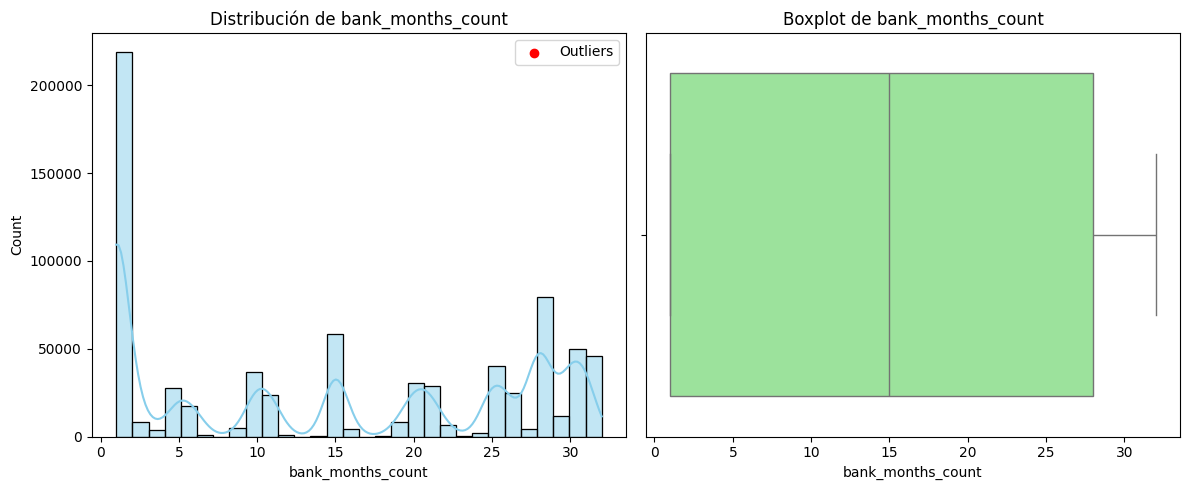

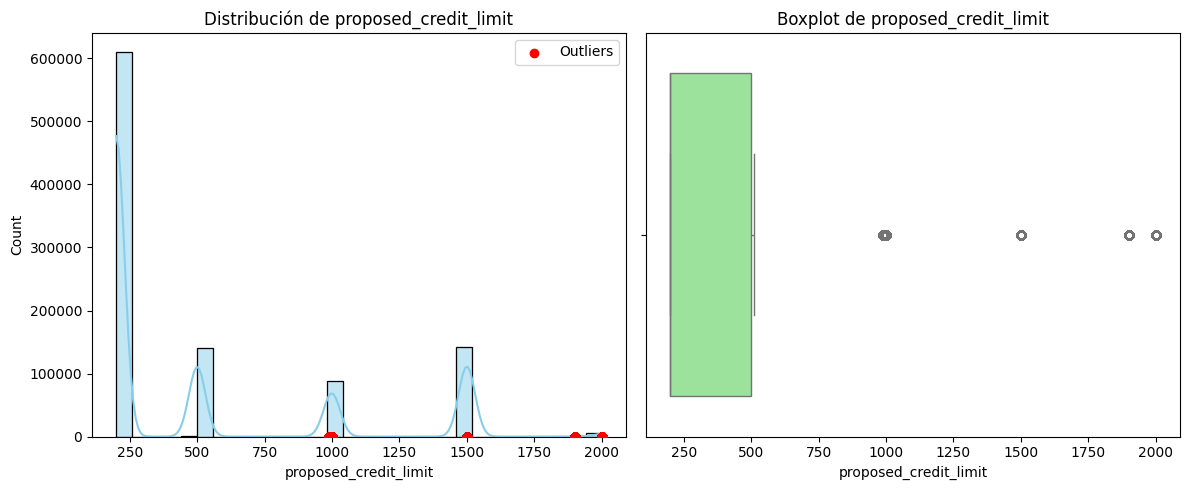

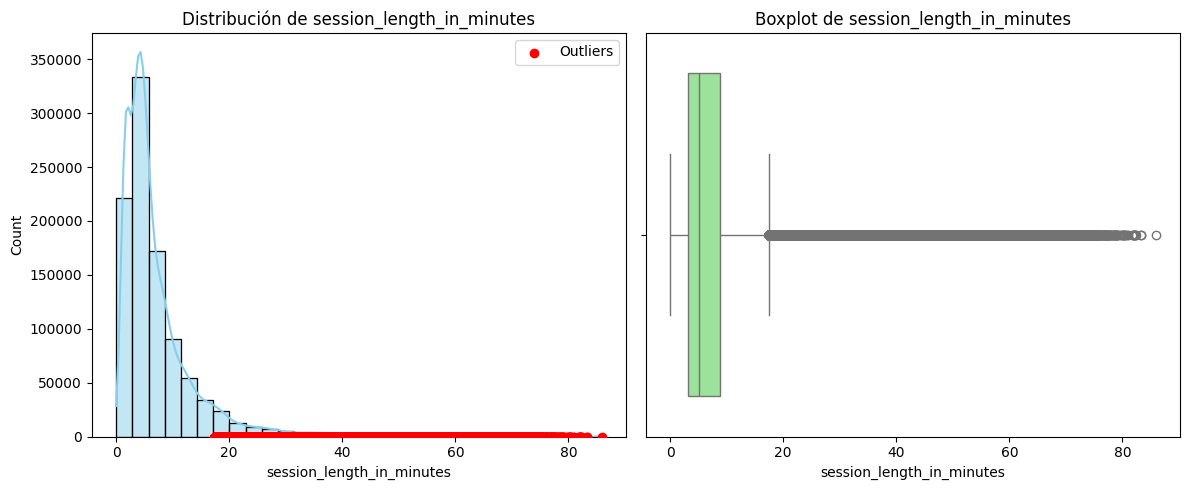

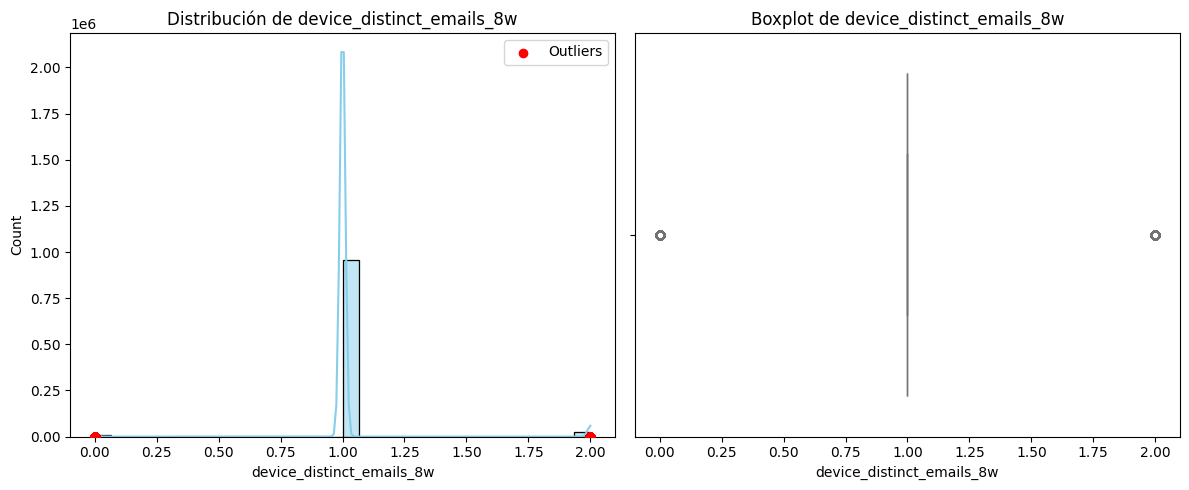

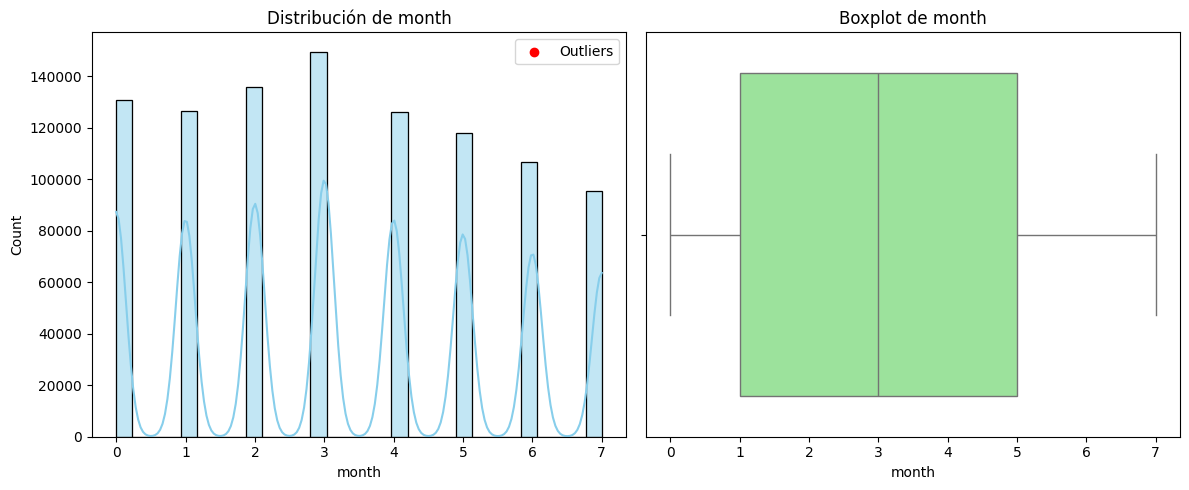

Columnas con outliers de no fraude: ['prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [13]:
cols_outliers = outliers_detection(base_no_fraud, cols_to_check)
print("Columnas con outliers de no fraude:", cols_outliers)


## Transformaciones para reducir outliers



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

sns.set(style="whitegrid")

def comparar_transformacion(nombre, original, transformada, metodo):
    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # original
    sns.histplot(np.ravel(original), kde=True, bins=30, color="skyblue", ax=axes[0])
    axes[0].set_title(f"{nombre} (original)")

    # transformada
    sns.histplot(np.ravel(transformada), kde=True, bins=30, color="lightgreen", ax=axes[1])
    axes[1].set_title(f"{nombre} ({metodo})")

    plt.tight_layout()
    plt.show()
    return

def log_1p(nombre, val):
    v = np.ravel(val).astype(float)
    t = np.log1p(v)
    comparar_transformacion(nombre, v, t, "log1p")
    return t

def log10_transform(nombre, val):
    v = np.ravel(val).astype(float)
    # Aquí usaremos un pequeño epsilon para no generar -inf
    v_safe = np.where(v <= 0, np.nan, v)  # Opción: poner NaN si hay 0 o negativos
    t = np.log10(v_safe)

    comparar_transformacion(nombre, v, t, "Log10")
    return t

def sqrt_transform(nombre, val):
    v = np.ravel(val).astype(float)
    v_safe = np.where(v < 0, np.nan, v)  # sqrt no acepta negativos
    t = np.sqrt(v_safe)
    comparar_transformacion(nombre, v, t, "Sqrt")
    return t

def yeo_johnson(nombre, val):
    pt = PowerTransformer(method="yeo-johnson", standardize=False)
    # Ajustar con datos de no-fraude para no distorsionar con outliers de fraude
    pt.fit(base_no_fraud[nombre].dropna().values.reshape(-1, 1).astype(float))
    t = pt.transform(val.astype(float)).ravel()
    comparar_transformacion(nombre, val, t, "Yeo-Johnson")
    return t

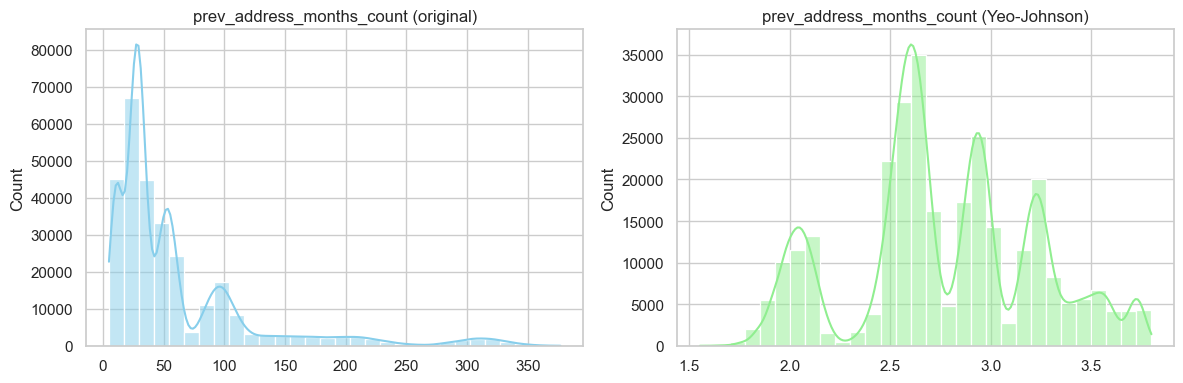

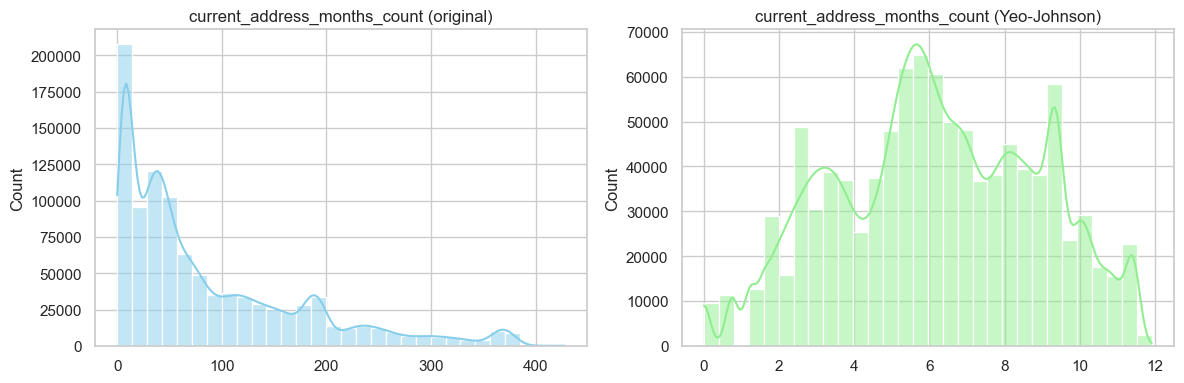

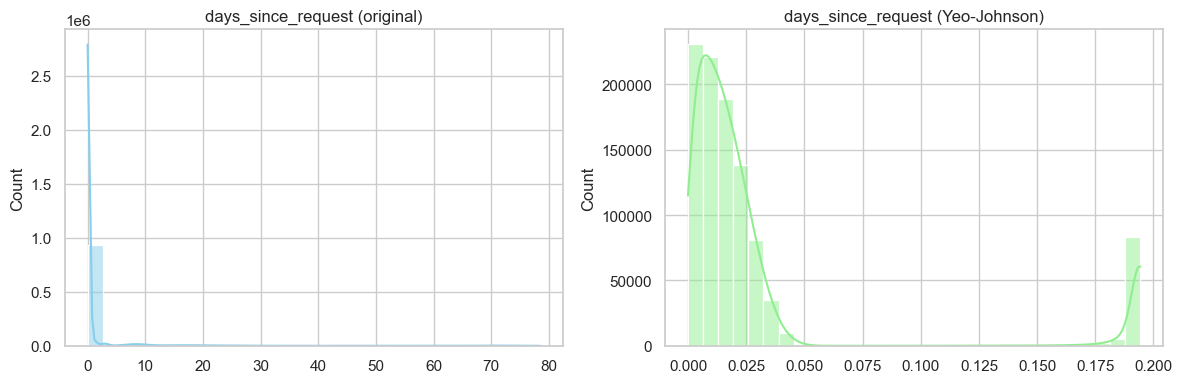

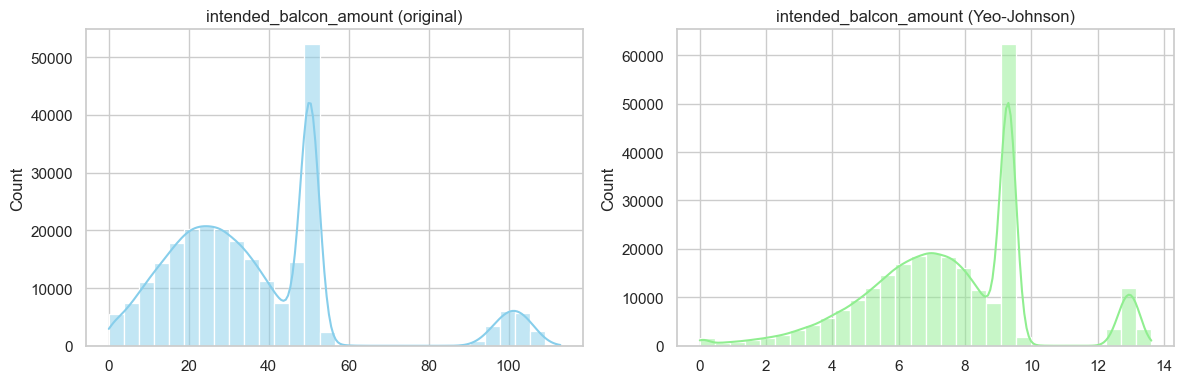

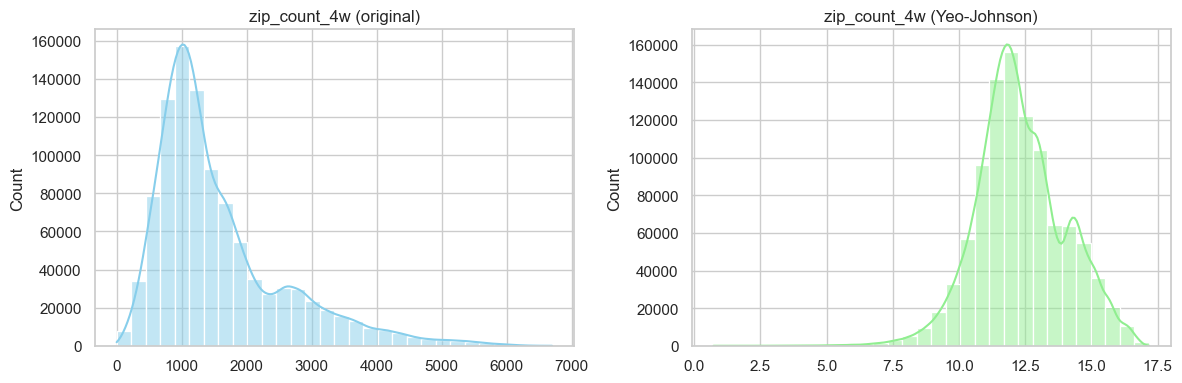

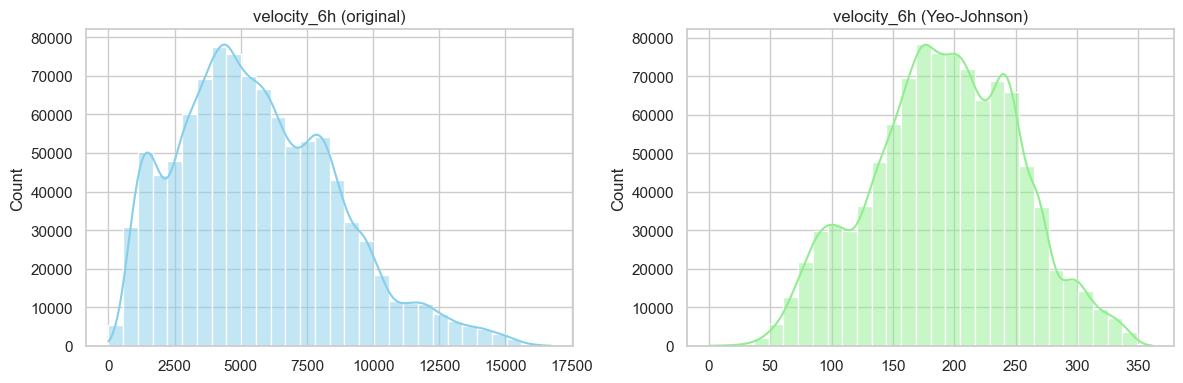

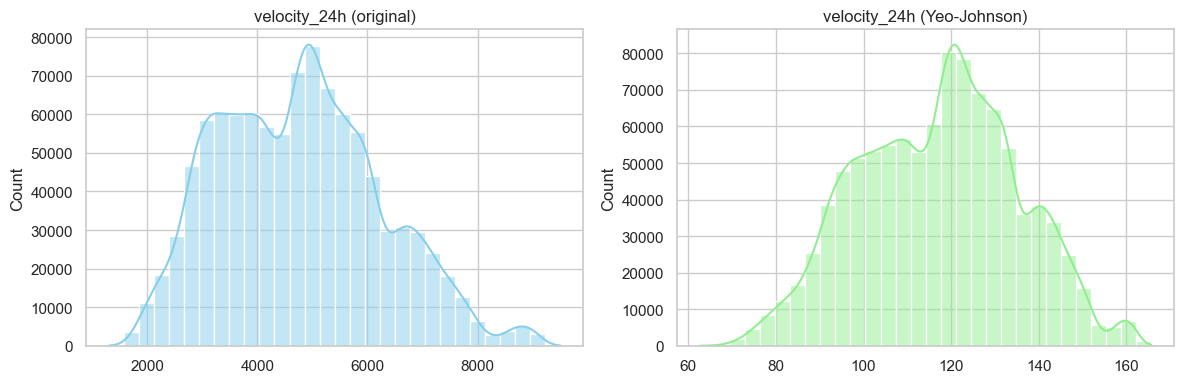

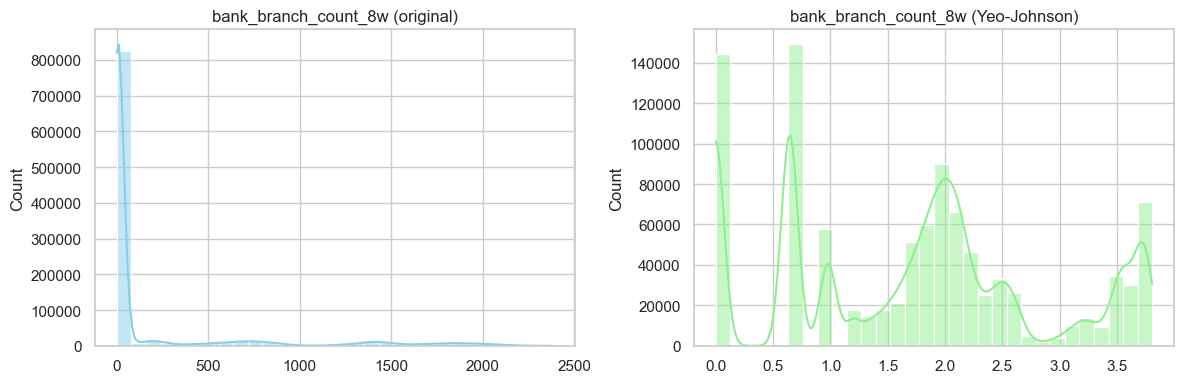

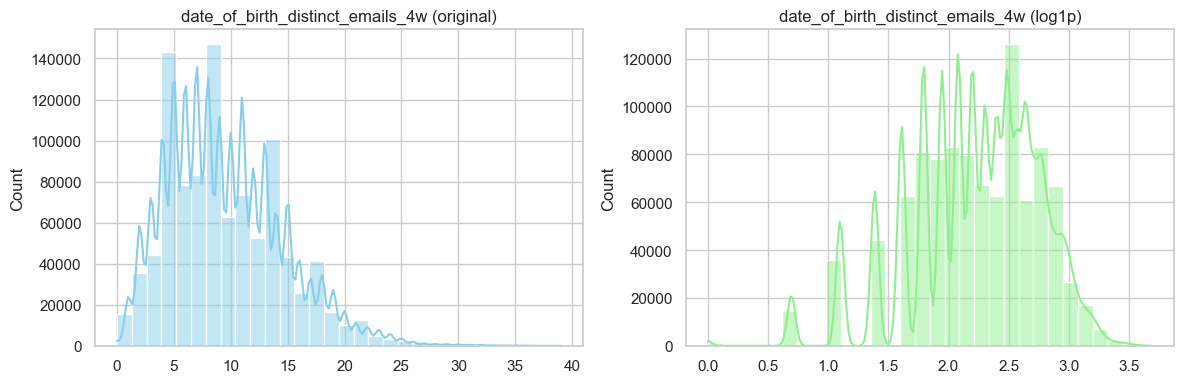

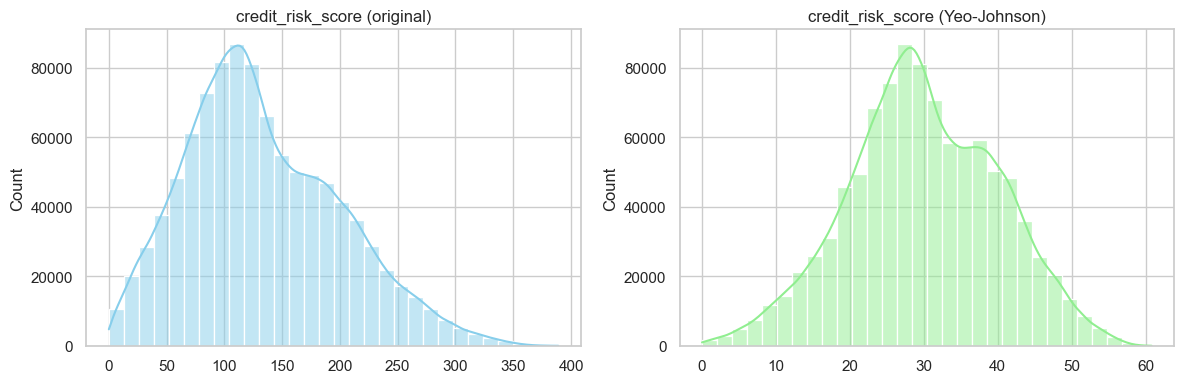

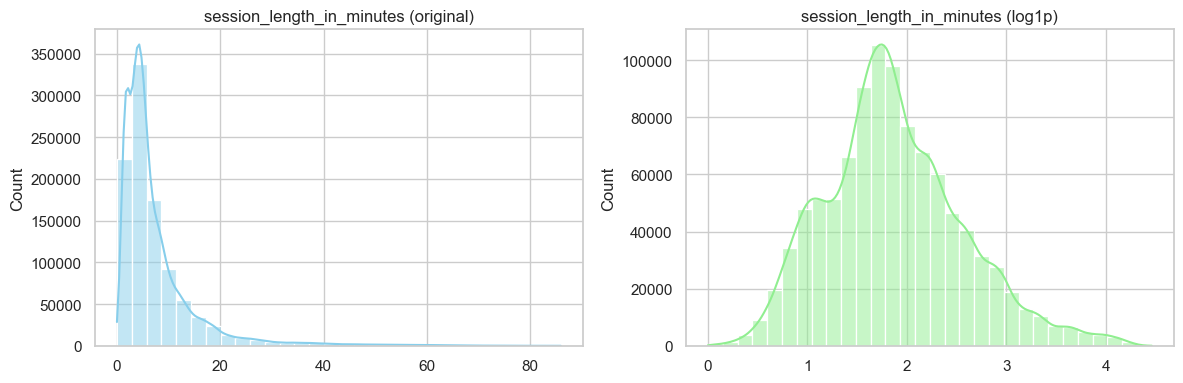

In [15]:
# prev_address_months_count ------> yeo-johnson
col = "prev_address_months_count"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# current_address_months_count ------> yeo-johnson
col = "current_address_months_count"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# days_since_request -------> yeo-johnson
col = "days_since_request"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# intended_balcon_amount ------> yeo-johnson
col = "intended_balcon_amount"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# zip_count_4w -----> yeo-johnson
col = "zip_count_4w"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_6h -----> yeo-johnson
col = "velocity_6h"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_24h -----> yeo-johnson
col = "velocity_24h"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# bank_branch_count_8w ------> yeo-johnson
col = "bank_branch_count_8w"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# date_of_birth_distinct_emails_4w ------> log1p
col = "date_of_birth_distinct_emails_4w"
m = base[col].notna()
base.loc[m, col] = log_1p(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# credit_risk_score -------> yeo-johnson
col = "credit_risk_score"
m = base[col].notna()
base.loc[m, col] = yeo_johnson(col, base.loc[m, col].to_numpy().reshape(-1, 1))

# session_length_in_minutes ------> log1p
col = "session_length_in_minutes"
m = base[col].notna()
base.loc[m, col] = log_1p(col, base.loc[m, col].to_numpy().reshape(-1, 1))

## Imputar valores NaN

In [16]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Columnas donde 0 = ausencia real (según BAF/Base.csv)
absence_real = [c for c in ["prev_address_months_count",
                            "bank_months_count",
                            "intended_balcon_amount"]
                if c in base.columns]

# Crear indicadores *_was_missing solo en numéricas con NaN
cols_with_nan = [c for c in num_cols if base[c].isna().any()]
for c in cols_with_nan:
    base[f"{c}_was_missing"] = base[c].isna().astype("int8")

# Imputación:
# 0 para ausencia real
for c in absence_real:
    base[c] = base[c].fillna(0)

# Mediana para el resto de numéricas con NaN
median_cols = [c for c in cols_with_nan if c not in absence_real]
for c in median_cols:
    base[c] = base[c].fillna(base[c].median())

## Codificación de variables categoricas

In [17]:
for col in cat_cols:
    print(base[col].value_counts())
    print('-'*20)

fraud_bool
0    988971
1     11029
Name: count, dtype: int64
--------------------
payment_type
AB    370554
AA    258249
AC    252071
AD    118837
AE       289
Name: count, dtype: int64
--------------------
employment_status
CA    730252
CB    138288
CF     44034
CC     37758
CD     26522
CE     22693
CG       453
Name: count, dtype: int64
--------------------
email_is_free
1    529886
0    470114
Name: count, dtype: int64
--------------------
housing_status
BC    372143
BB    260965
BA    169675
BE    169135
BD     26161
BF      1669
BG       252
Name: count, dtype: int64
--------------------
phone_home_valid
0    582923
1    417077
Name: count, dtype: int64
--------------------
phone_mobile_valid
1    889676
0    110324
Name: count, dtype: int64
--------------------
has_other_cards
0    777012
1    222988
Name: count, dtype: int64
--------------------
foreign_request
0    974758
1     25242
Name: count, dtype: int64
--------------------
source
INTERNET    992952
TELEAPP       7048
Na

### ONE-HOT ENCODING para categóricas

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

cat_cols = ["payment_type","employment_status","housing_status","source","device_os"]
enc = OneHotEncoder(handle_unknown="ignore", dtype=np.uint8)
one_hot = enc.fit_transform(base[cat_cols])

one_hot_df = pd.DataFrame(
    one_hot.toarray(),  # Convert sparse matrix to dense array
    columns=enc.get_feature_names_out(cat_cols),
    index=base.index
)

base_clean = pd.concat([base.drop(columns=cat_cols), one_hot_df], axis=1)

print("Dataset limpio listo:", base_clean.shape)

Dataset limpio listo: (1000000, 62)


## Descargar

In [19]:
# Exportar a CSV
base_clean.to_csv("base_clean.csv", index=False)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

# **Limpieza de datos (Variante II)**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
vii = pd.read_csv("Variant II.csv")
vii.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.7               0.062288                         -1   
1           0     0.9               0.098433                         -1   
2           0     0.6               0.116962                         -1   
3           0     0.3               0.059078                         10   
4           0     0.1               0.689959                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            24            50            0.016740   
1                           310            50            0.019002   
2                           189            60            0.047064   
3                            40            60            0.008007   
4                           128            30            2.513544   

   intended_balcon_amount payment_type  zip_count_4w  ...  has_other_cards  \
0               -0.871747           AB          3430  ...                1   
1               -1.023805           AB          3492  ...                1   
2               -1.206121           AB          4621  ...                0   
3               -0.075908           AA          1697  ...                1   
4               -1.108190           AD          1431  ...                0   

   proposed_credit_limit  foreign_request    source  \
0                  200.0                0  INTERNET   
1                 1500.0                0  INTERNET   
2                  200.0                0  INTERNET   
3                  200.0                0  INTERNET   
4                  200.0                0  INTERNET   

   session_length_in_minutes  device_os  keep_alive_session  \
0                   6.804428      other                   0   
1                   1.412211  macintosh                   0   
2                  14.488562      other                   1   
3                   6.152497      linux                   1   
4                   5.599853      other                   0   

   device_distinct_emails_8w device_fraud_count  month  
0                          1                  0      0  
1                          1                  0      0  
2                          1                  0      0  
3                          1                  0      0  
4                          1                  0      0  

[5 rows x 32 columns]

In [22]:
vii.shape

(1000000, 32)

In [23]:
print(vii.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [24]:
# Número total de duplicados (filas idénticas en todas las columnas)
print("Duplicados:", vii.duplicated().sum())

Duplicados: 0


In [25]:
vii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

## Conversión de valores nulos

In [26]:
(vii == -1).sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           759415
current_address_months_count          3488
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      435
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   241872
has_other_cards                          0
proposed_cr

In [27]:
# Convertir valores fuera de rango en NaN
for col, (low, high) in ranges.items():
    if col in vii.columns:
        vii.loc[(vii[col] < low) | (vii[col] > high), col] = np.nan

print("Valores fuera de rango reemplazados por NaN")


Valores fuera de rango reemplazados por NaN


In [28]:
# Contar negativos por columna
negativos = (vii[num_cols] < 0).sum()

print(negativos)

income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
month                               0
dtype: int64


## Detección y corrección de outliers

In [29]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

# 1. Filtrar solo no-fraude
vii_no_fraud = vii[vii['fraud_bool'] == 0].copy()

# 2. Detectar columnas numéricas directamente en vii_no_fraud
num_cols_nf = [c for c in vii_no_fraud.columns if is_numeric_dtype(vii_no_fraud[c])]

# 3. Quitar binarias (0/1) y target de esa lista
cols_to_check2 = []
for c in num_cols_nf:
    vals = vii_no_fraud[c].dropna().unique()
    if not set(vals).issubset({0, 1}):  # descartar binarias
        cols_to_check2.append(c)

print("Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):")
print(cols_to_check2)

Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):
['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w', 'month']


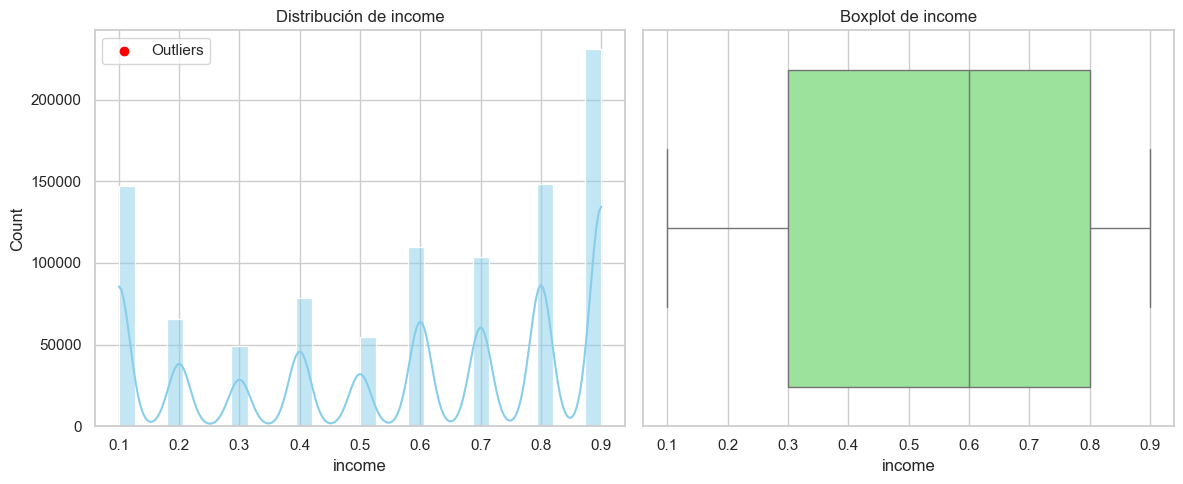

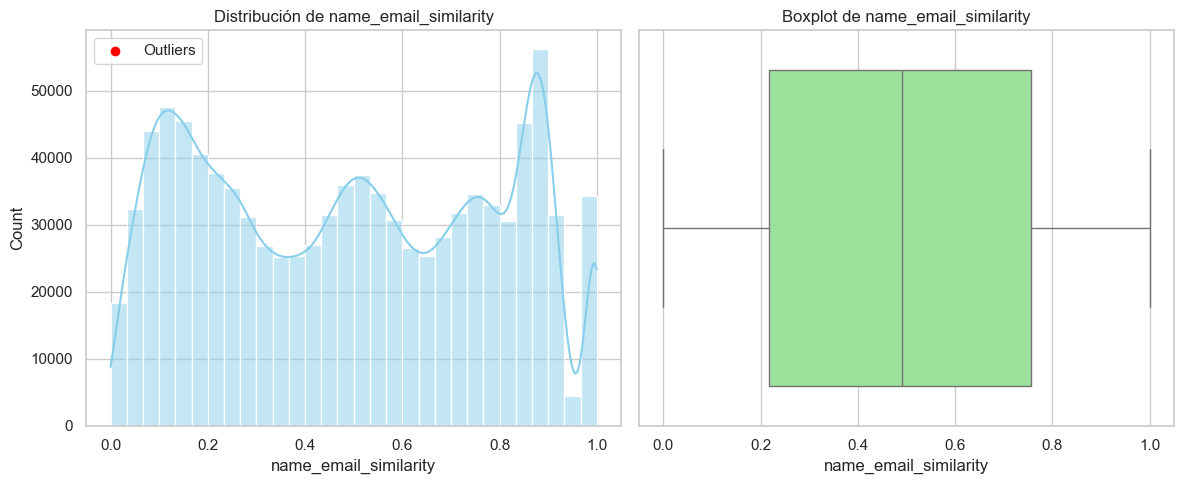

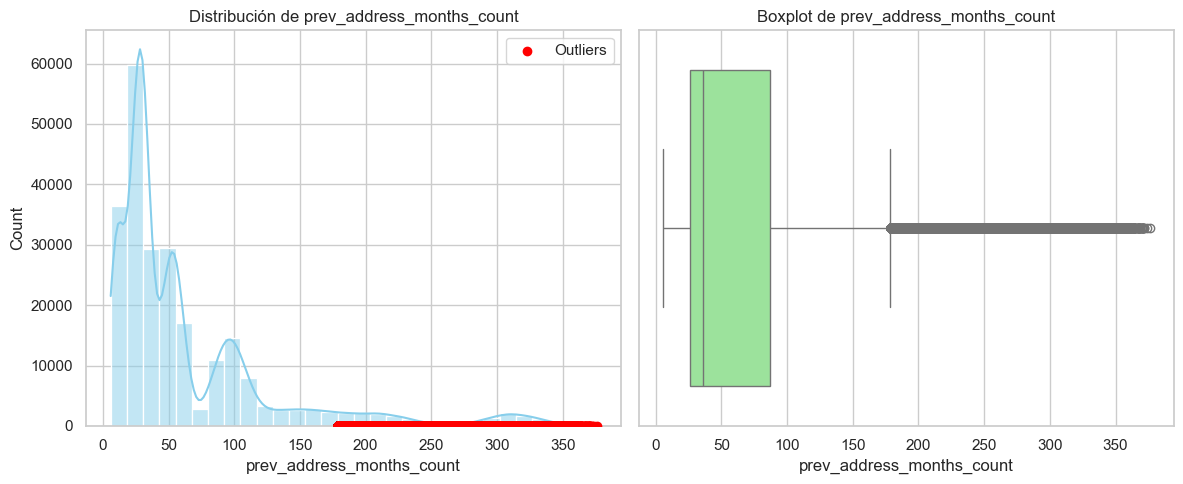

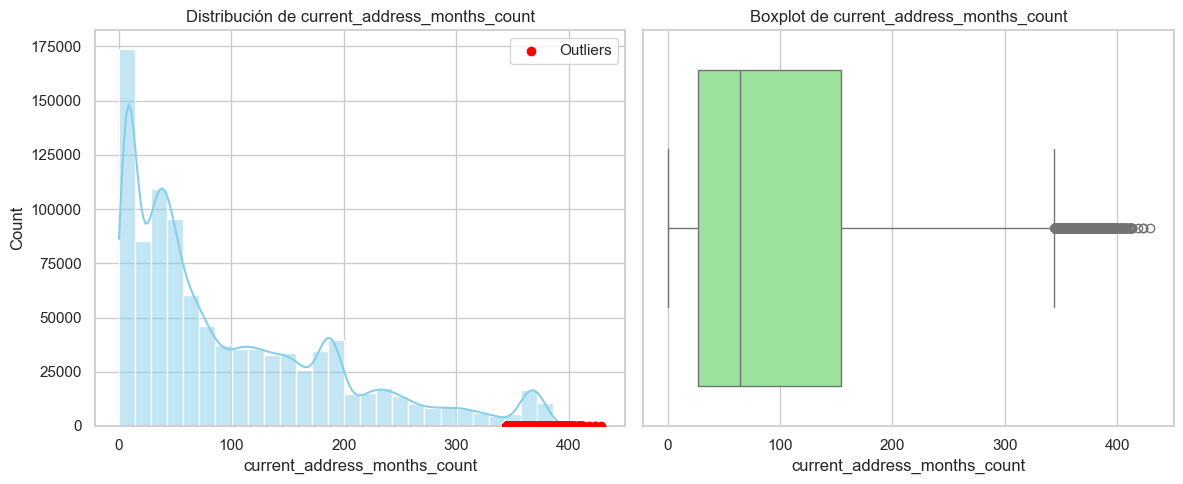

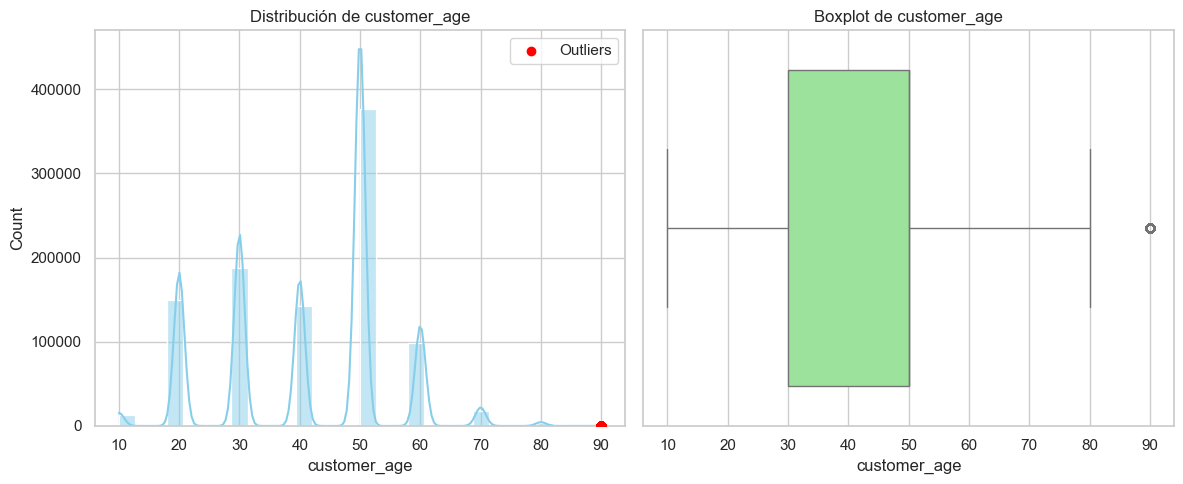

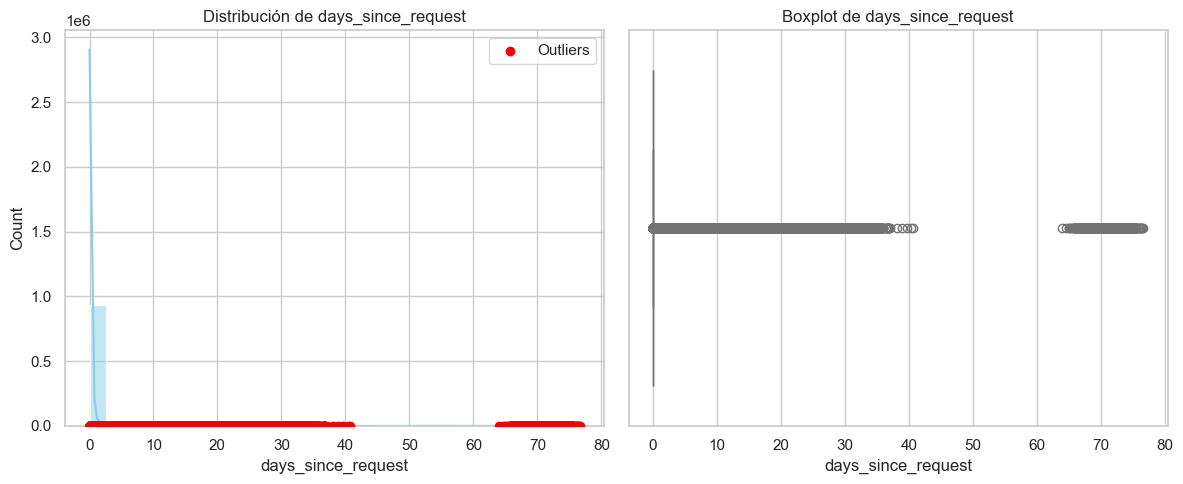

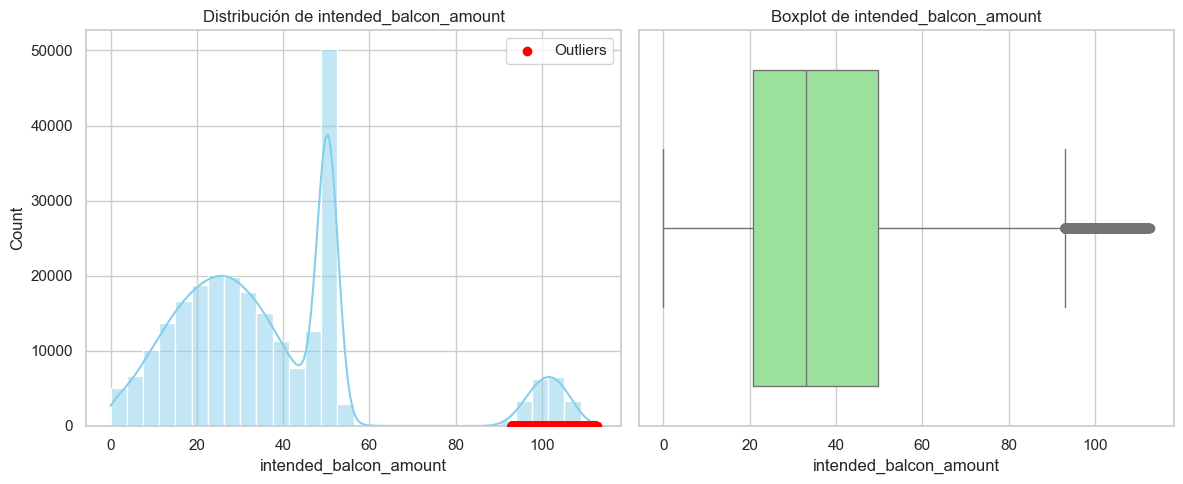

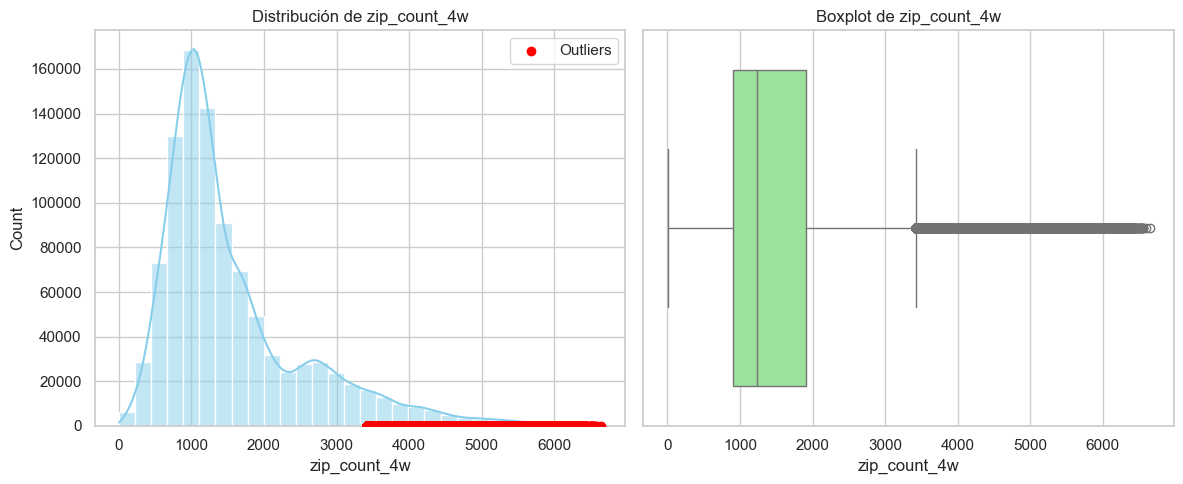

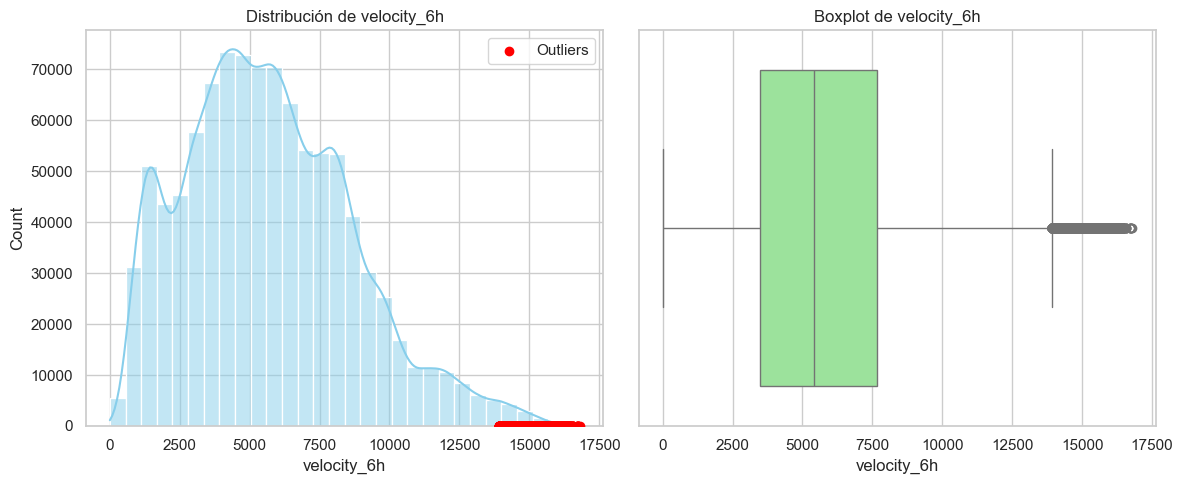

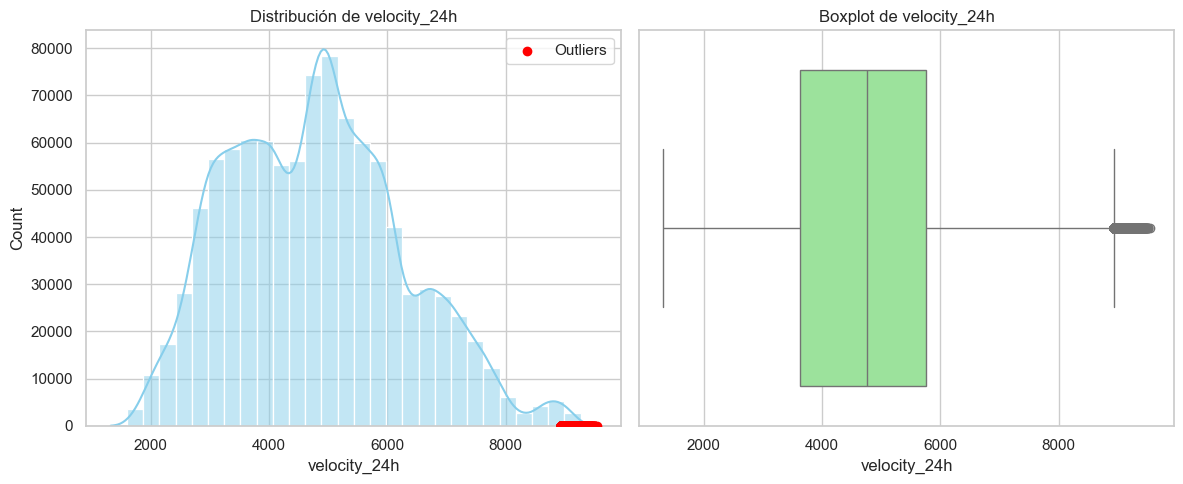

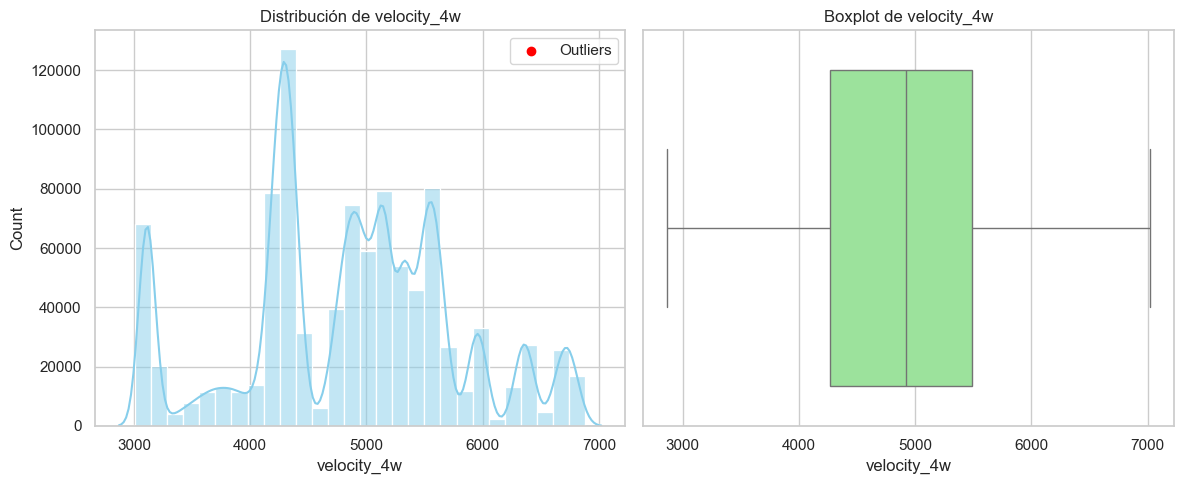

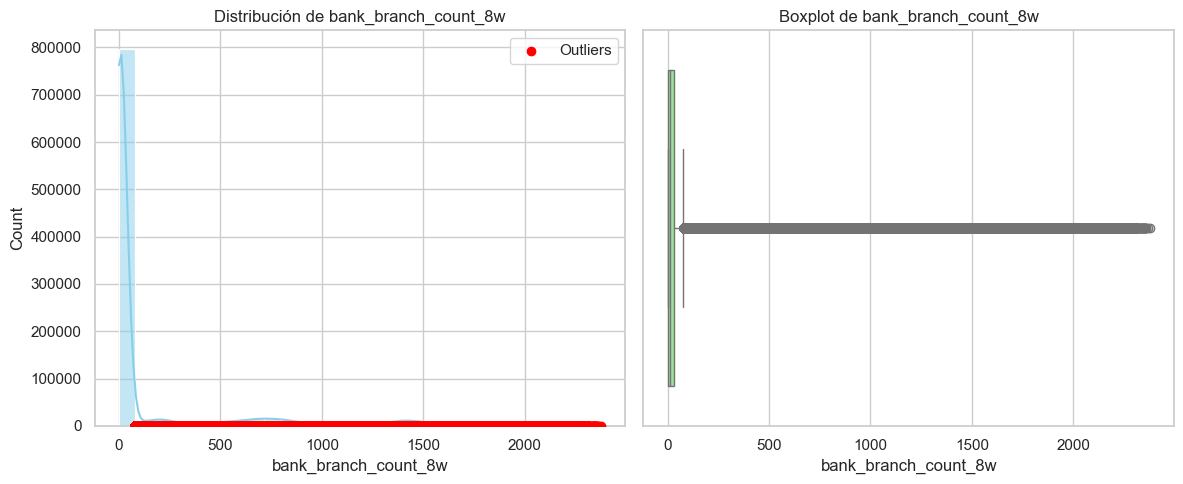

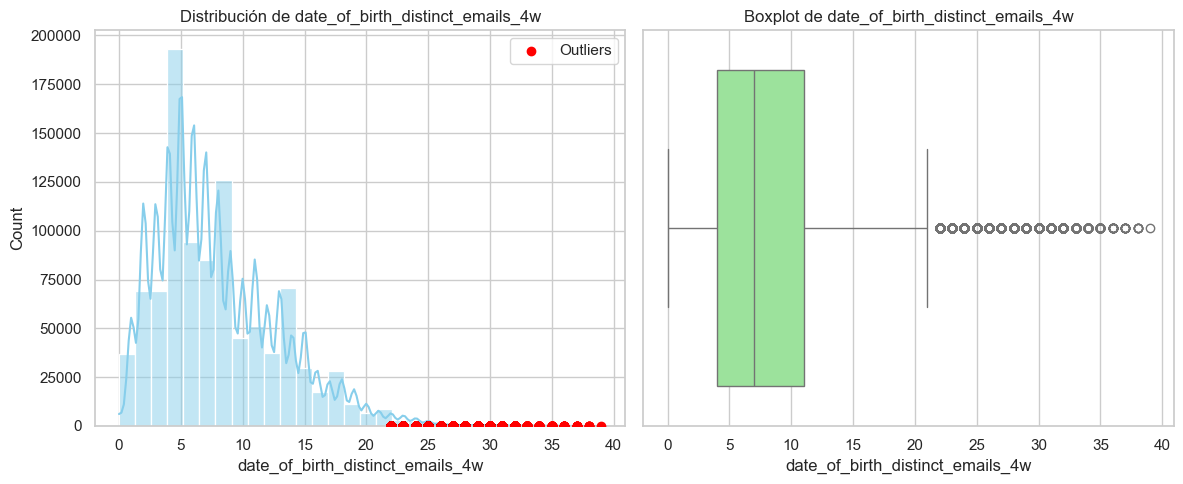

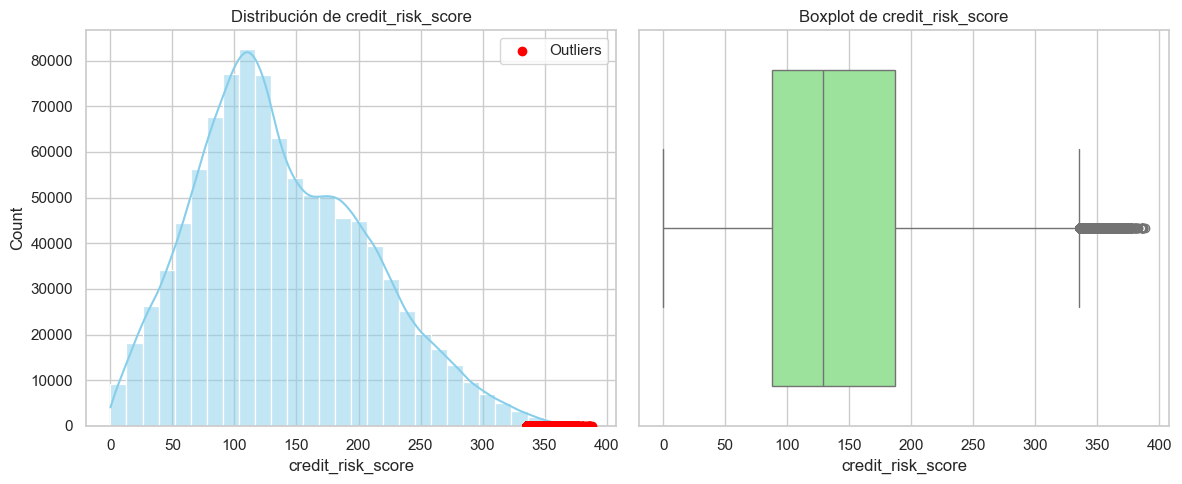

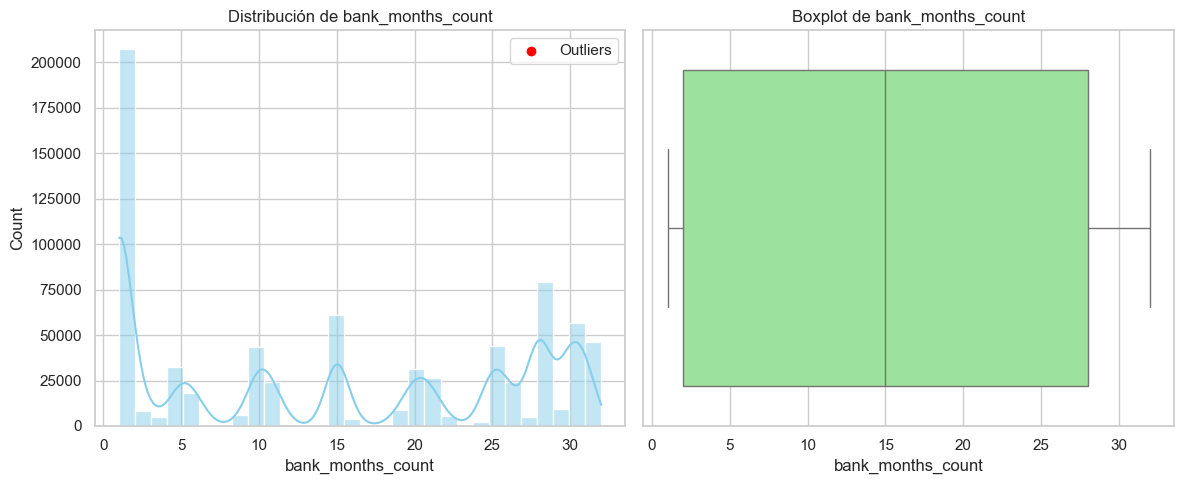

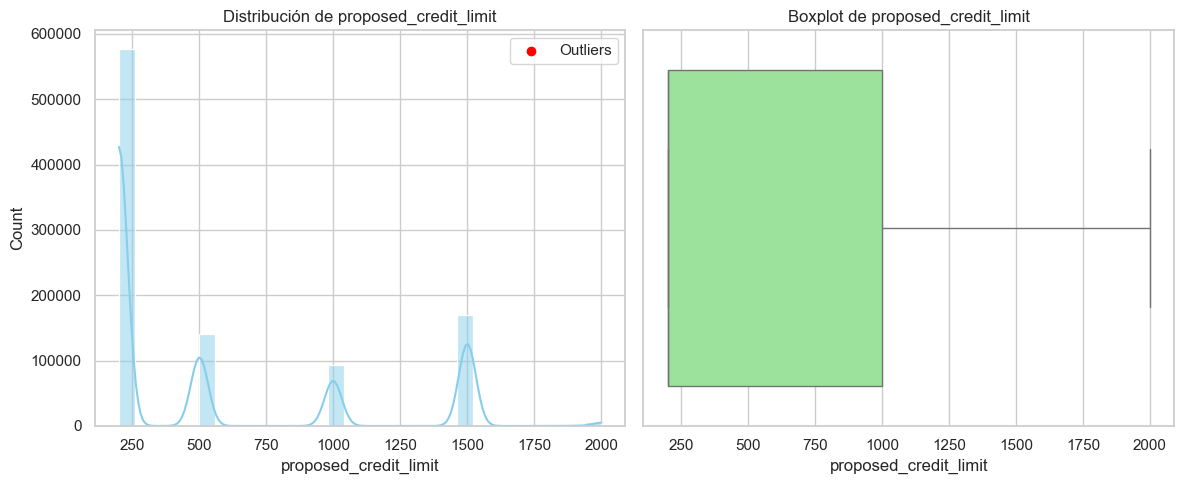

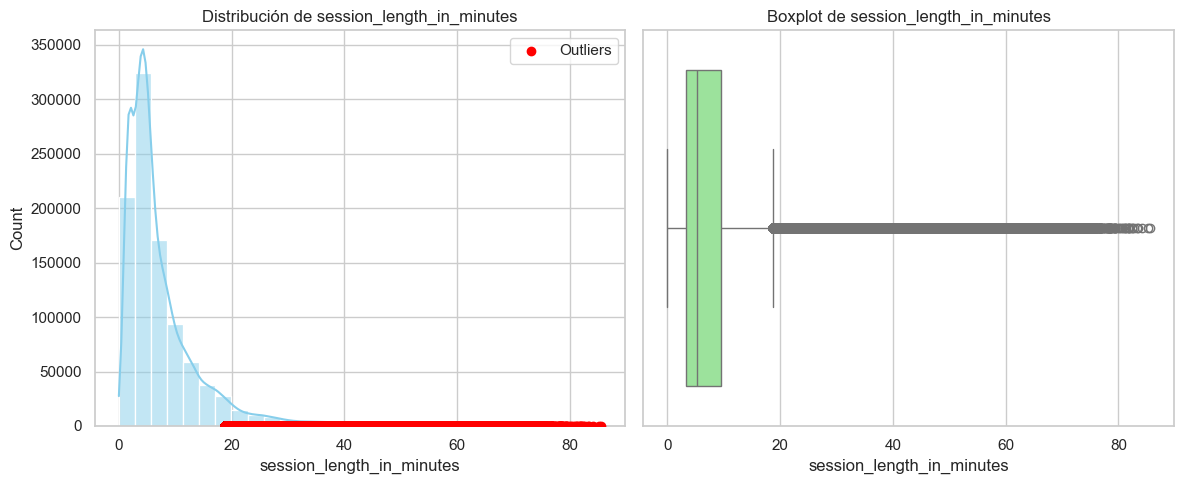

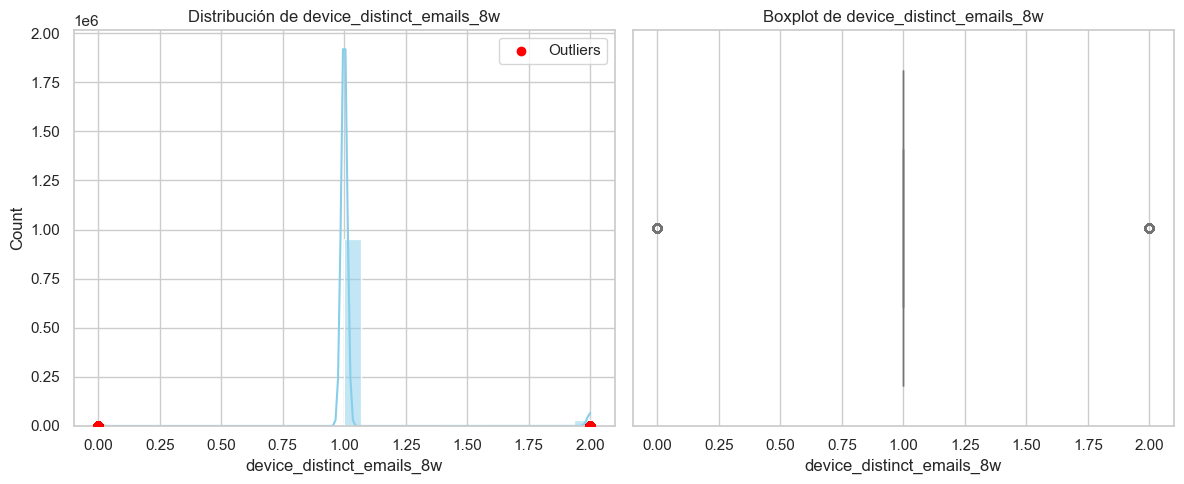

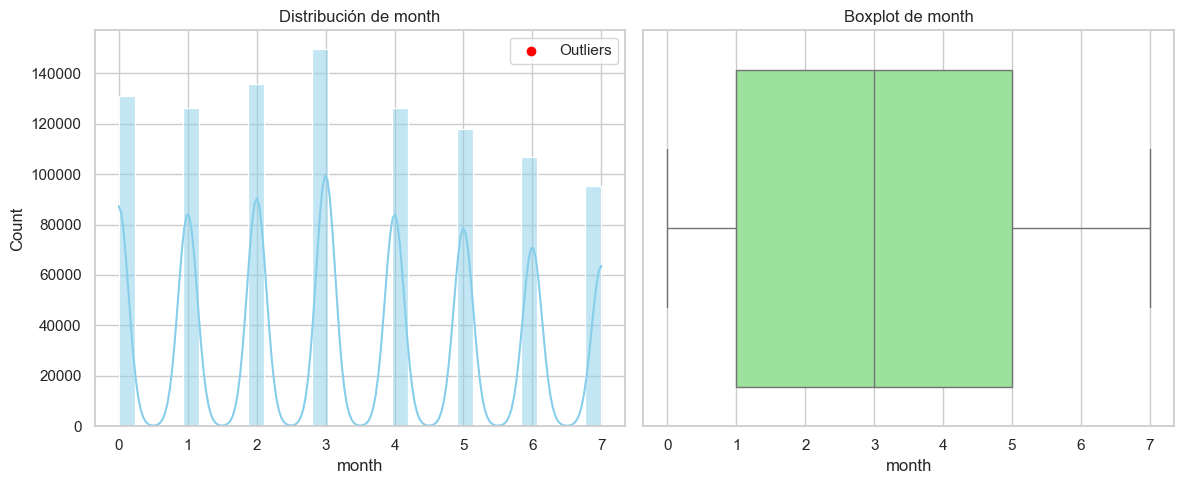

Columnas con outliers de no fraude: ['prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'session_length_in_minutes', 'device_distinct_emails_8w']


In [30]:
cols_outliers = outliers_detection(vii_no_fraud, cols_to_check2)
print("Columnas con outliers de no fraude:", cols_outliers)



---



*   prev_address_months_count
* current_address_months_count
* days_since_request
* intended_balcon_amount
* zip_count_4w
* velocity_6h
* velocity_24h
* velocity_4w
* bank_branch_count_8w
* date_of_birth_distinct_emails_4w
* credit_risk_score
* session_length_in_minutes



## Transformaciones

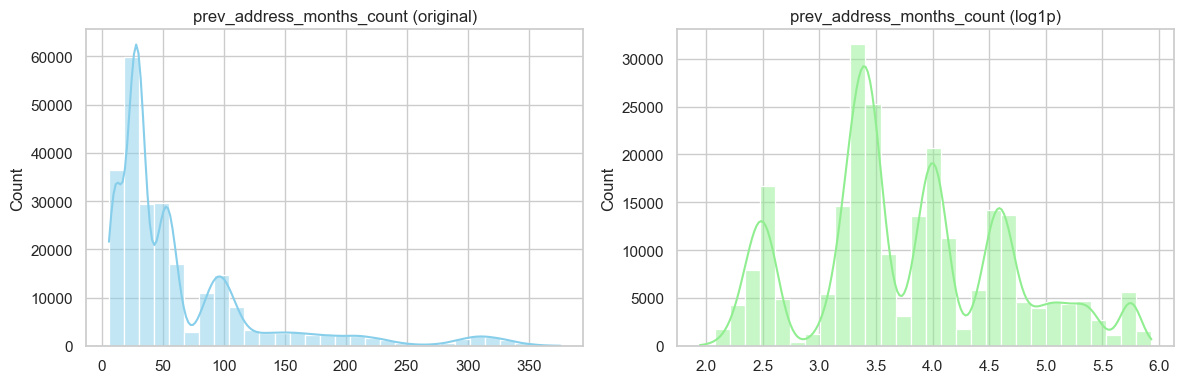

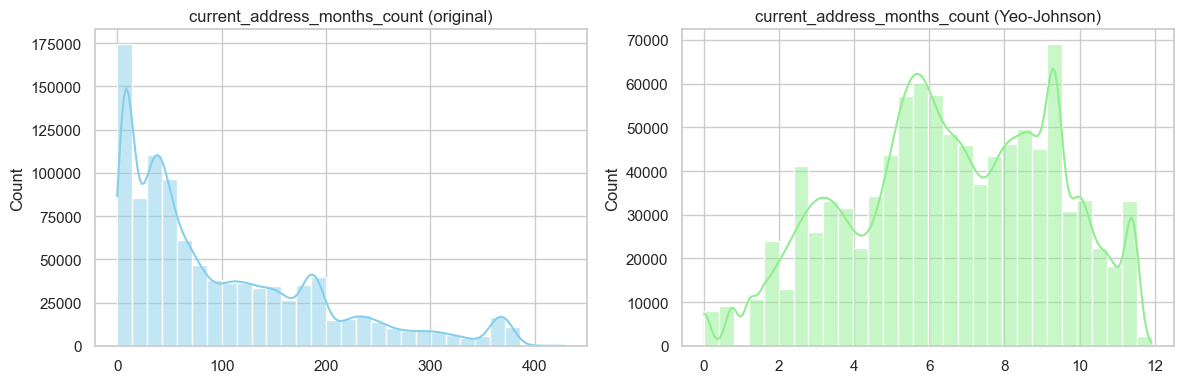

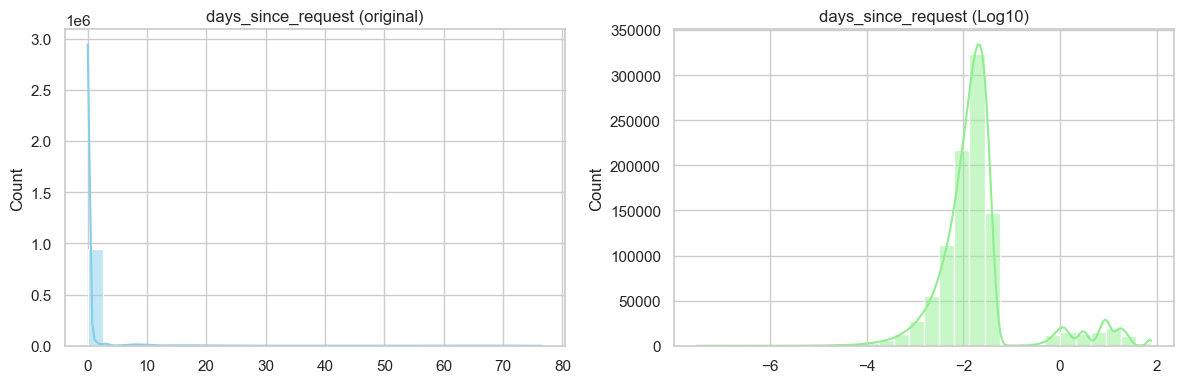

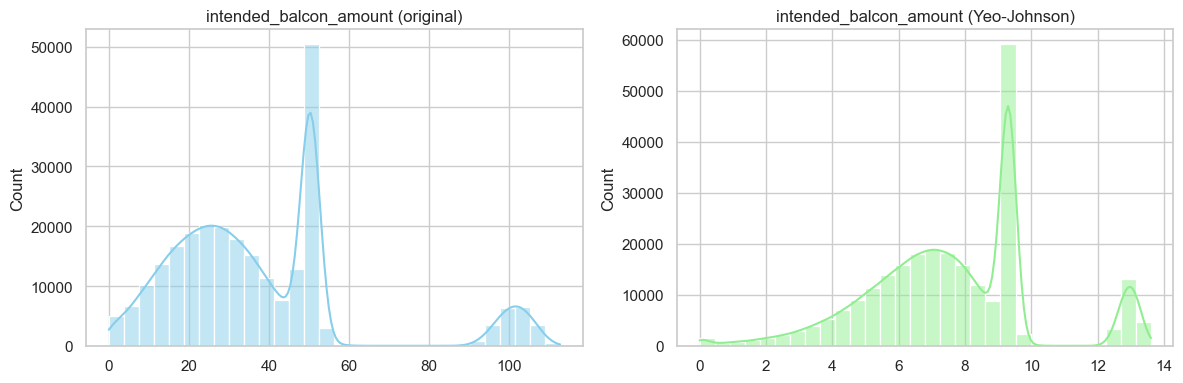

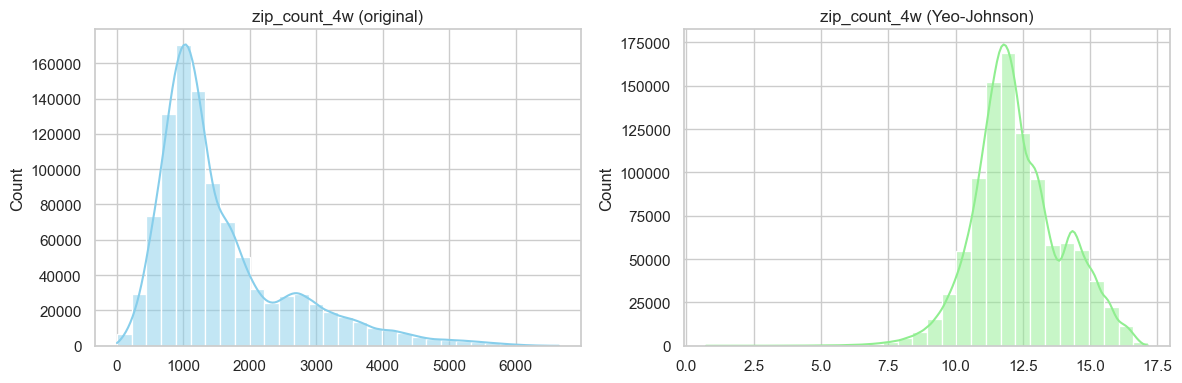

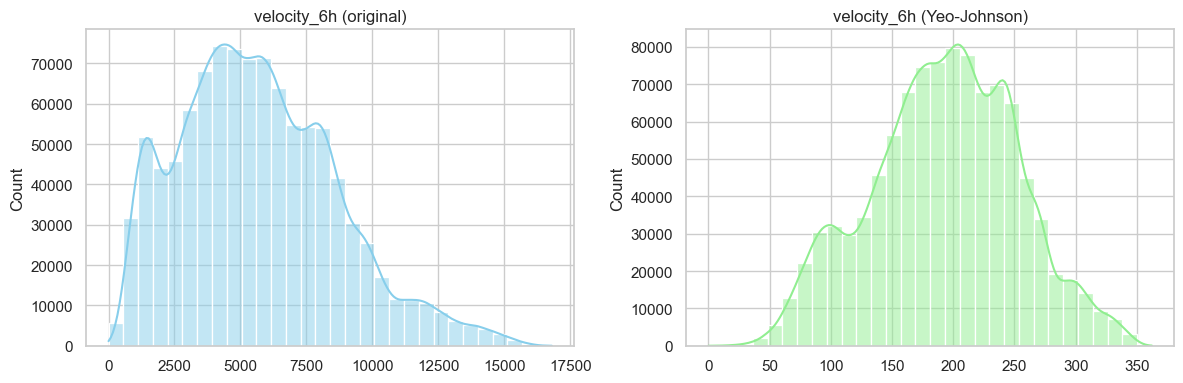

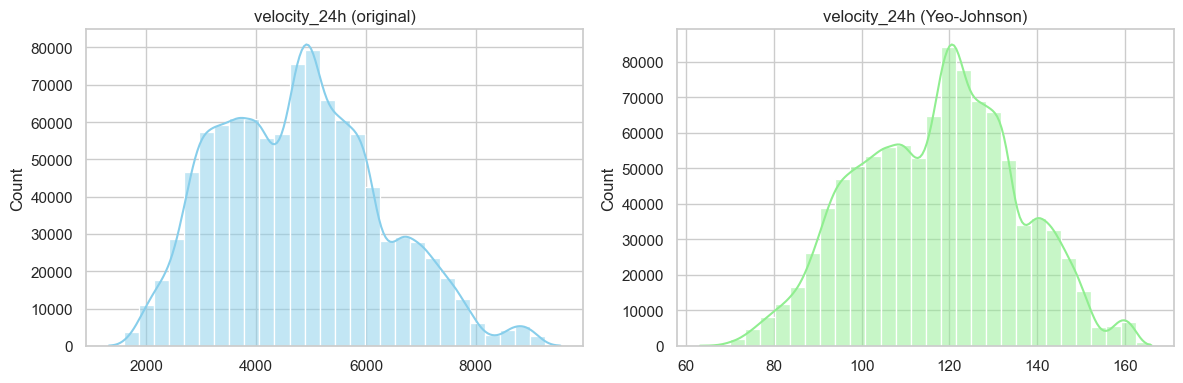

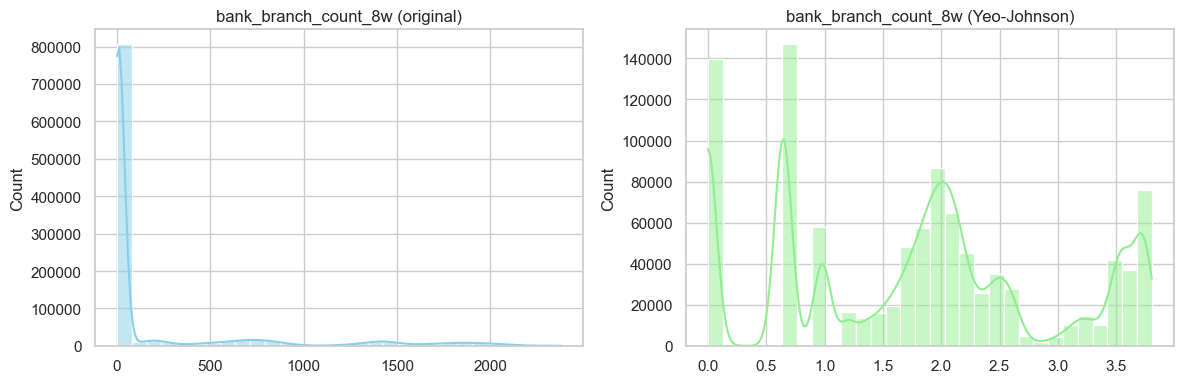

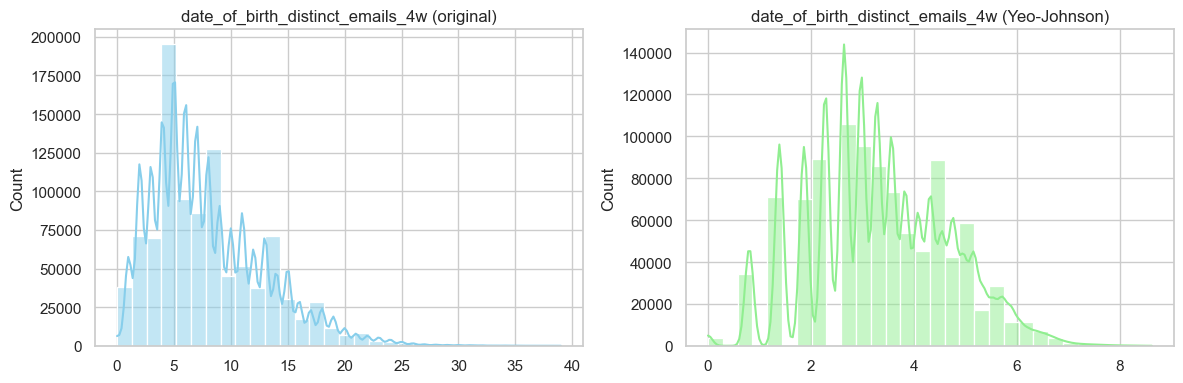

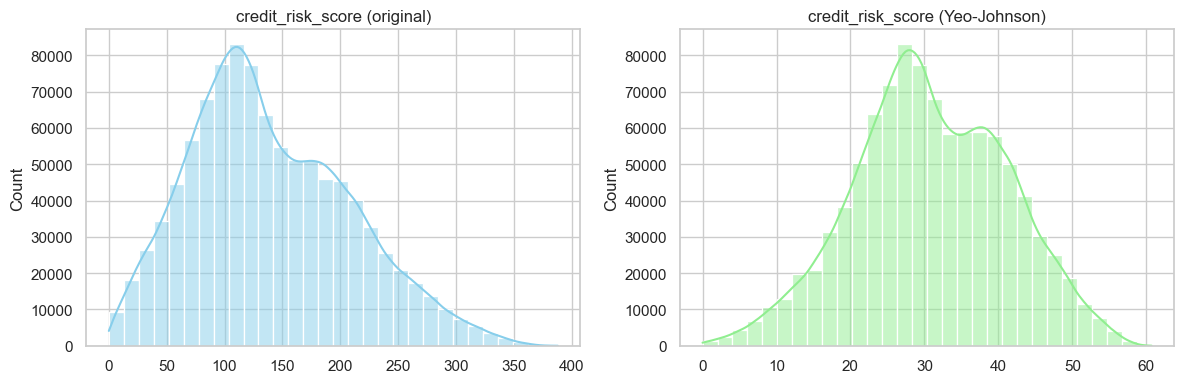

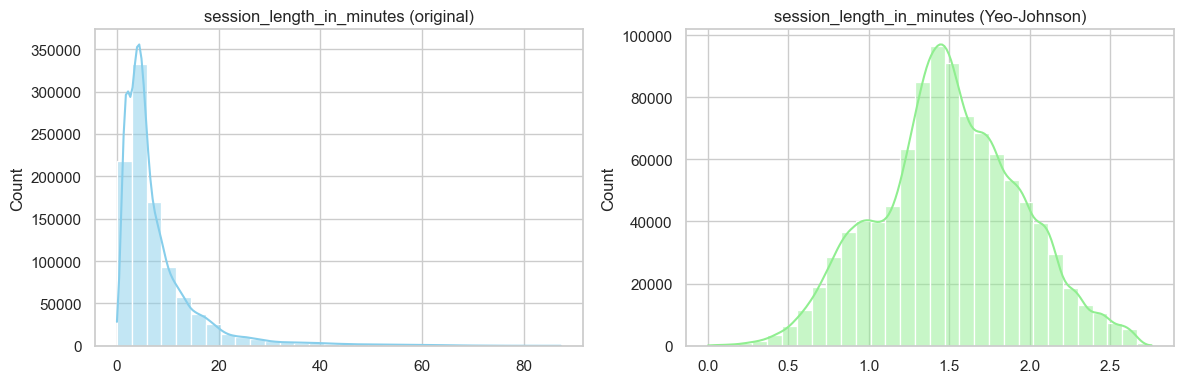

In [31]:
# prev_address_months_count ------> log1p
col = "prev_address_months_count"
m = vii[col].notna()  # tras la limpieza
vii.loc[m, col] = log_1p(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# current_address_months_count ------> yeo-johnson
col = "current_address_months_count"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# days_since_request -------> log10
col = "days_since_request"
m = vii[col].notna()
vii.loc[m, col] = log10_transform(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# intended_balcon_amount ------> yeo-johnson
col = "intended_balcon_amount"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# zip_count_4w -----> yeo-johnson
col = "zip_count_4w"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_6h -----> yeo-johnson
col = "velocity_6h"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_24h -----> yeo-johnson
col = "velocity_24h"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# bank_branch_count_8w ------> yeo-johnson
col = "bank_branch_count_8w"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# date_of_birth_distinct_emails_4w ------> yeo-johnson
col = "date_of_birth_distinct_emails_4w"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# credit_risk_score -------> yeo-johnson
col = "credit_risk_score"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

# session_length_in_minutes ------> yeo-johnson
col = "session_length_in_minutes"
m = vii[col].notna()
vii.loc[m, col] = yeo_johnson(col, vii.loc[m, col].to_numpy().reshape(-1, 1))

## Imputar valores NaN

In [32]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Columnas donde 0 = ausencia real (según BAF/vii.csv)
absence_real = [c for c in ["prev_address_months_count",
                            "bank_months_count",
                            "intended_balcon_amount"]
                if c in vii.columns]

# Crear indicadores *_was_missing solo en numéricas con NaN
cols_with_nan = [c for c in num_cols if vii[c].isna().any()]
for c in cols_with_nan:
    vii[f"{c}_was_missing"] = vii[c].isna().astype("int8")

# Imputación:
# 0 para ausencia real
for c in absence_real:
    vii[c] = vii[c].fillna(0)

# Mediana para el resto de numéricas con NaN
median_cols = [c for c in cols_with_nan if c not in absence_real]
for c in median_cols:
    vii[c] = vii[c].fillna(vii[c].median())

## Codificación de variables categoricas

In [33]:
for col in cat_cols:
    print(vii[col].value_counts())
    print('-'*20)

payment_type
AB    395277
AA    251688
AC    242178
AD    110604
AE       253
Name: count, dtype: int64
--------------------
employment_status
CA    677869
CB    141784
CC     88937
CF     44833
CD     27328
CE     18758
CG       491
Name: count, dtype: int64
--------------------
housing_status
BC    339599
BB    295316
BA    214963
BE    121975
BD     26147
BF      1720
BG       280
Name: count, dtype: int64
--------------------
source
INTERNET    992175
TELEAPP       7825
Name: count, dtype: int64
--------------------
device_os
linux        338900
windows      304157
other        299534
macintosh     49218
x11            8191
Name: count, dtype: int64
--------------------


### ONE-HOT ENCODING para categóricas

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

cat_cols = ["payment_type","employment_status","housing_status","source","device_os"]
enc = OneHotEncoder(handle_unknown="ignore", dtype=np.uint8)
one_hot = enc.fit_transform(vii[cat_cols])

one_hot_df = pd.DataFrame(
    one_hot.toarray(),  # Convert sparse matrix to dense array
    columns=enc.get_feature_names_out(cat_cols),
    index=vii.index
)

vii_clean = pd.concat([vii.drop(columns=cat_cols), one_hot_df], axis=1)

print("Dataset limpio listo:", vii_clean.shape)

Dataset limpio listo: (1000000, 62)


## Descargar

In [35]:
# Exportar a CSV
vii_clean.to_csv("vii_clean.csv", index=False)

# **Limpieza de datos (Variante III)**

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
viii = pd.read_csv("Variant III.csv")
viii.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.5               0.489311                         24   
1           0     0.9               0.535394                         -1   
2           0     0.5               0.188964                         -1   
3           0     0.4               0.391397                         29   
4           0     0.1               0.592711                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                            20            50            0.019819   
1                            82            40            0.007959   
2                            73            60            0.027117   
3                             5            20            0.021103   
4                           267            40            0.039380   

   intended_balcon_amount payment_type  zip_count_4w  ...  foreign_request  \
0               -0.857899           AC          1842  ...                0   
1               -1.560356           AB          1241  ...                0   
2               -0.897317           AC          1095  ...                0   
3               -0.473215           AB           888  ...                0   
4               16.213862           AA           599  ...                0   

     source  session_length_in_minutes  device_os  keep_alive_session  \
0  INTERNET                   1.873109      other                   0   
1  INTERNET                  20.170591      linux                   1   
2  INTERNET                   1.722109      other                   1   
3  INTERNET                   2.152433      linux                   1   
4  INTERNET                  14.204698      other                   0   

  device_distinct_emails_8w  device_fraud_count  month        x1        x2  
0                         1                   0      0 -0.351078 -0.429230  
1                         1                   0      0 -0.424817  0.394155  
2                         1                   0      0 -1.974833  0.332406  
3                         1                   0      0 -0.579442  0.427254  
4                         1                   0      0  1.915776  1.363967  

[5 rows x 34 columns]

In [37]:
viii.shape

(1000000, 34)

In [38]:
print(viii.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [39]:
# Número total de duplicados (filas idénticas en todas las columnas)
print("Duplicados:", viii.duplicated().sum())

Duplicados: 0


In [40]:
viii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

## Conversión de valores nulos

In [41]:
(viii == -1).sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           762005
current_address_months_count          3473
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      402
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   247242
has_other_cards                          0
proposed_cr

In [42]:
# Convertir valores fuera de rango en NaN
for col, (low, high) in ranges.items():
    if col in viii.columns:
        viii.loc[(viii[col] < low) | (viii[col] > high), col] = np.nan

print("Valores fuera de rango reemplazados por NaN")

Valores fuera de rango reemplazados por NaN


In [43]:
# Contar negativos por columna
negativos = (viii[num_cols] < 0).sum()

print(negativos)

income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
credit_risk_score                   0
bank_months_count                   0
proposed_credit_limit               0
session_length_in_minutes           0
device_distinct_emails_8w           0
month                               0
dtype: int64


## Detección y corrección de outliers

In [44]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

# 1. Filtrar solo no-fraude
viii_no_fraud = viii[viii['fraud_bool'] == 0].copy()

# 2. Detectar columnas numéricas directamente en viii_no_fraud
num_cols_nf = [c for c in viii_no_fraud.columns if is_numeric_dtype(viii_no_fraud[c])]

# 3. Quitar binarias (0/1) y target de esa lista
cols_to_check3 = []
for c in num_cols_nf:
    vals = viii_no_fraud[c].dropna().unique()
    if not set(vals).issubset({0, 1}):  # descartar binarias
        cols_to_check3.append(c)

print("Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):")
print(cols_to_check3)

Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):
['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w', 'month', 'x1', 'x2']


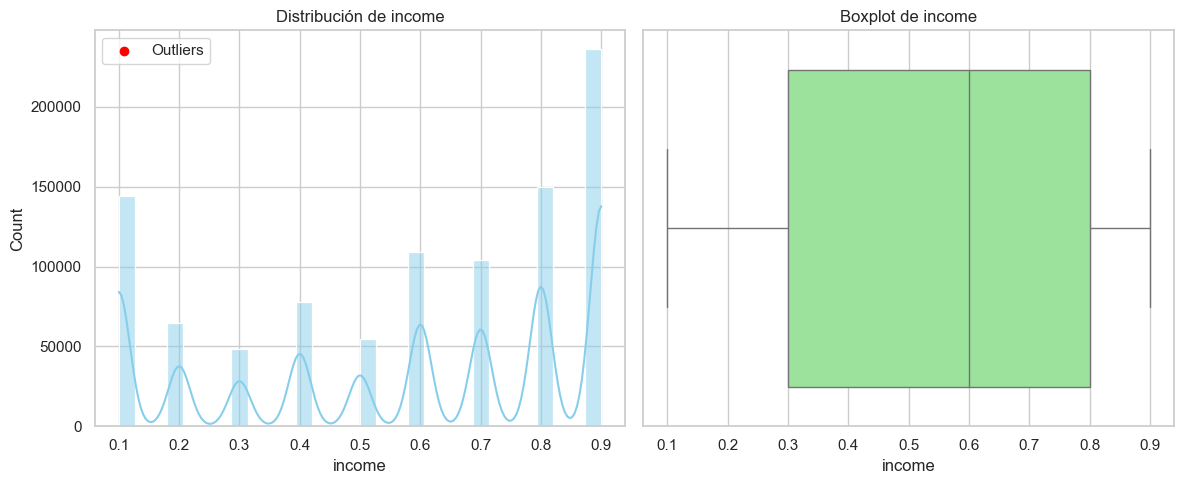

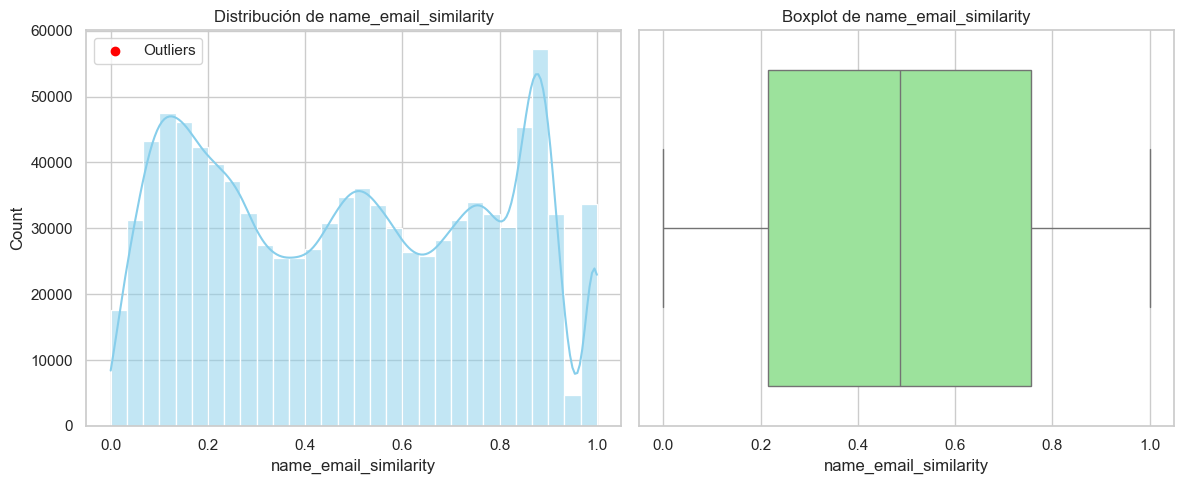

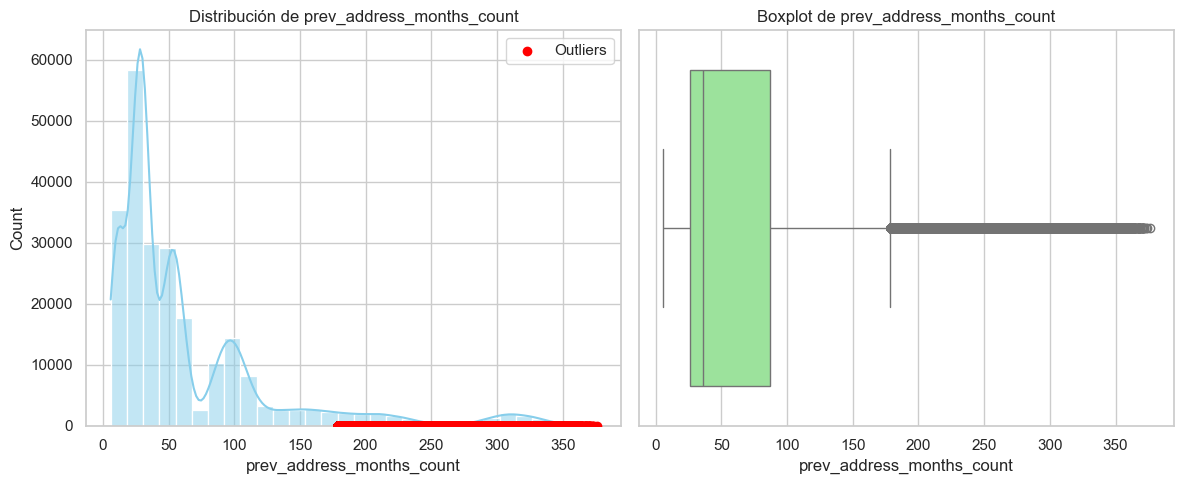

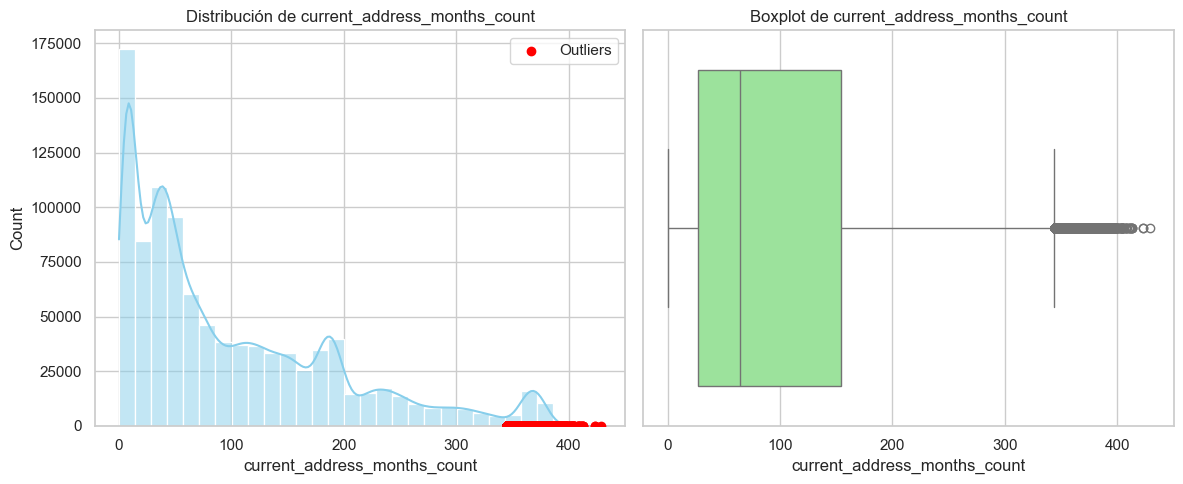

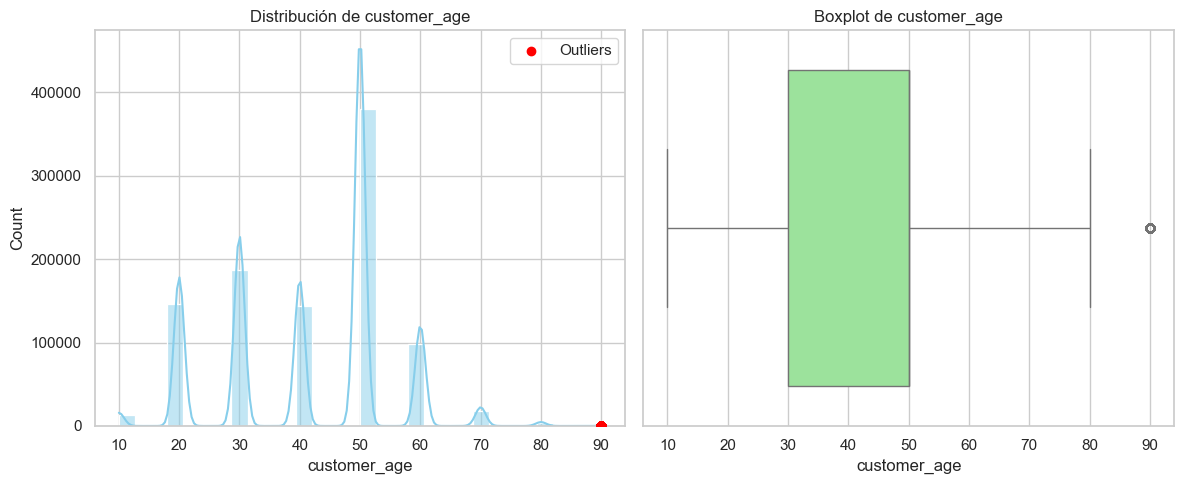

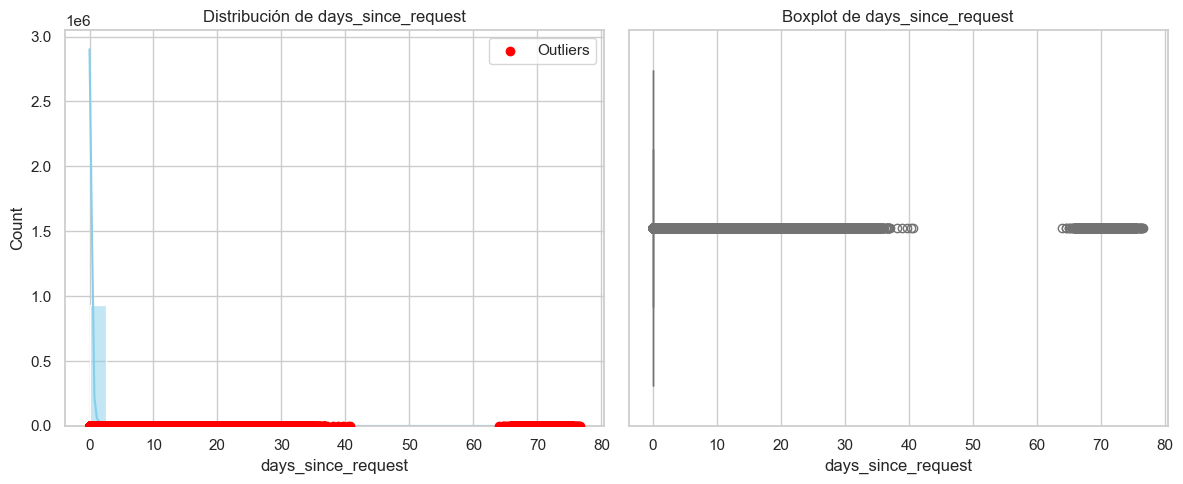

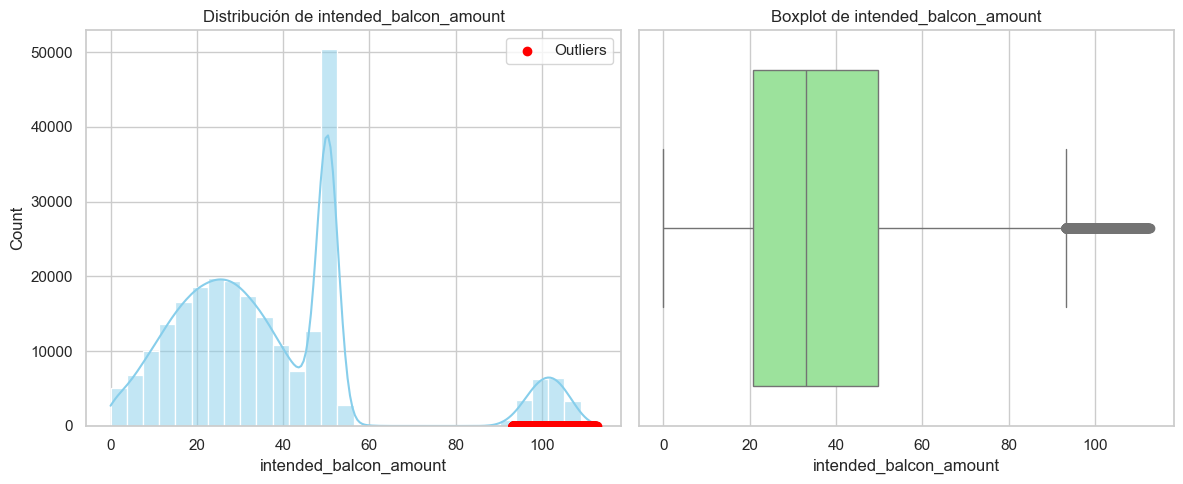

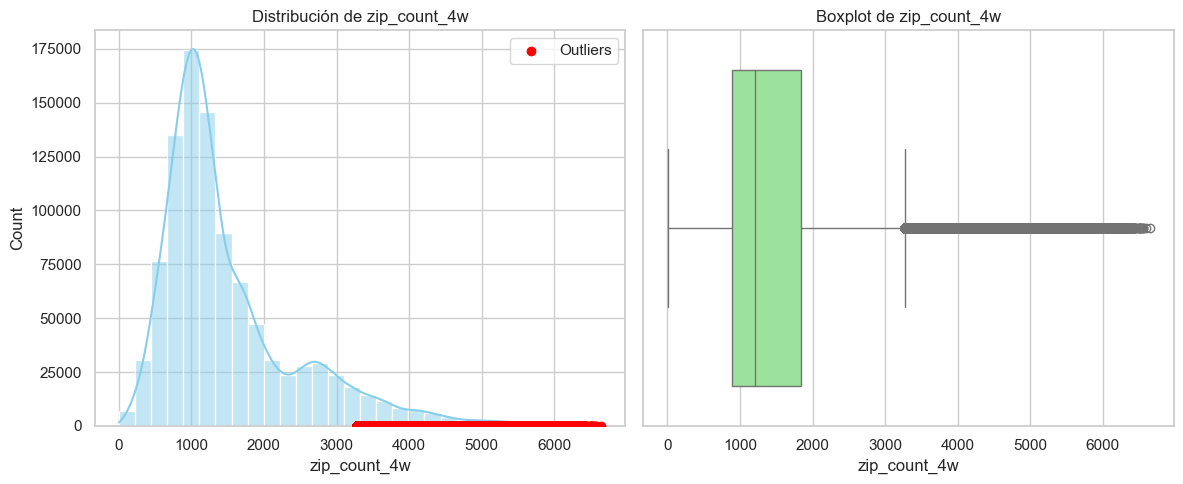

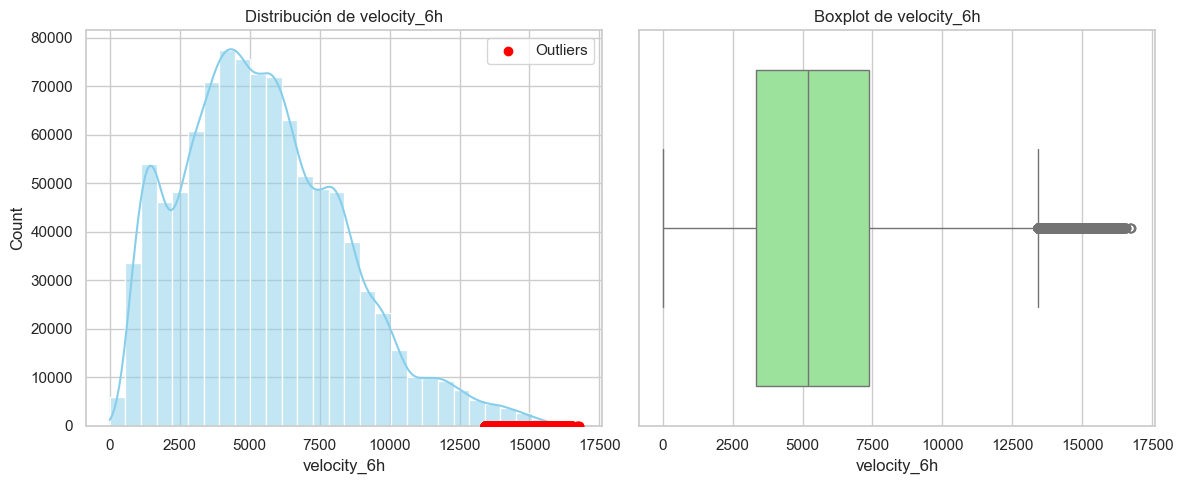

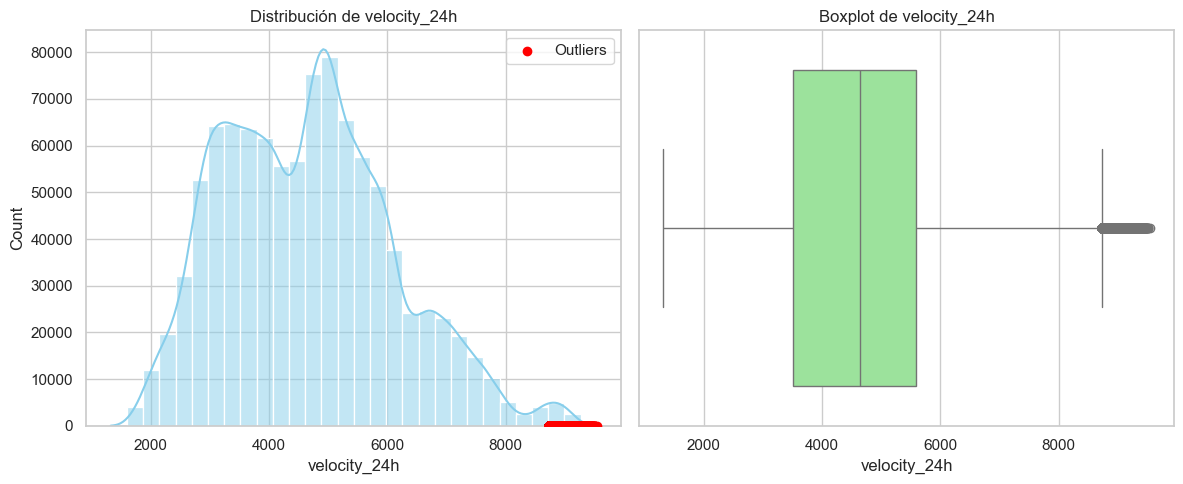

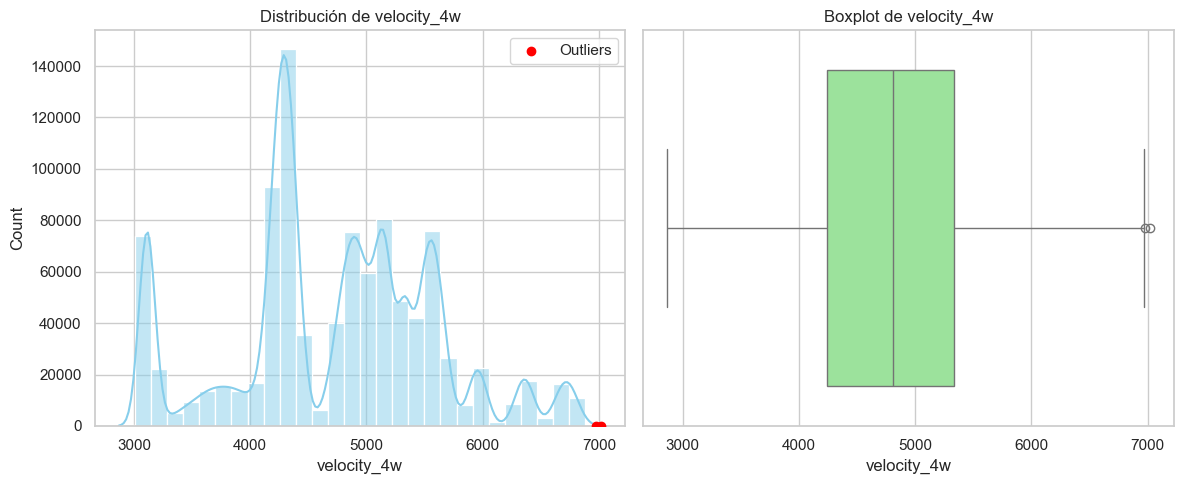

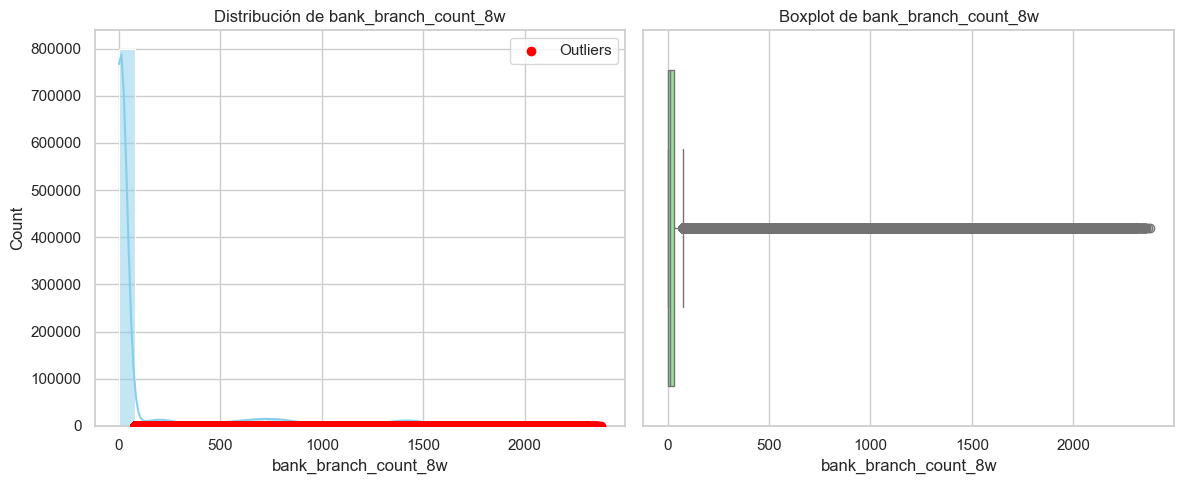

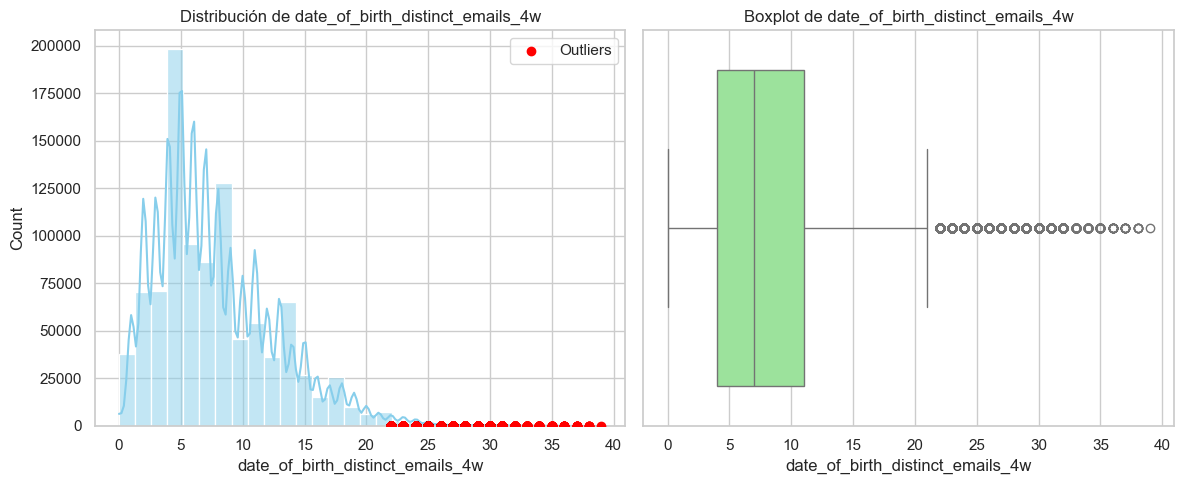

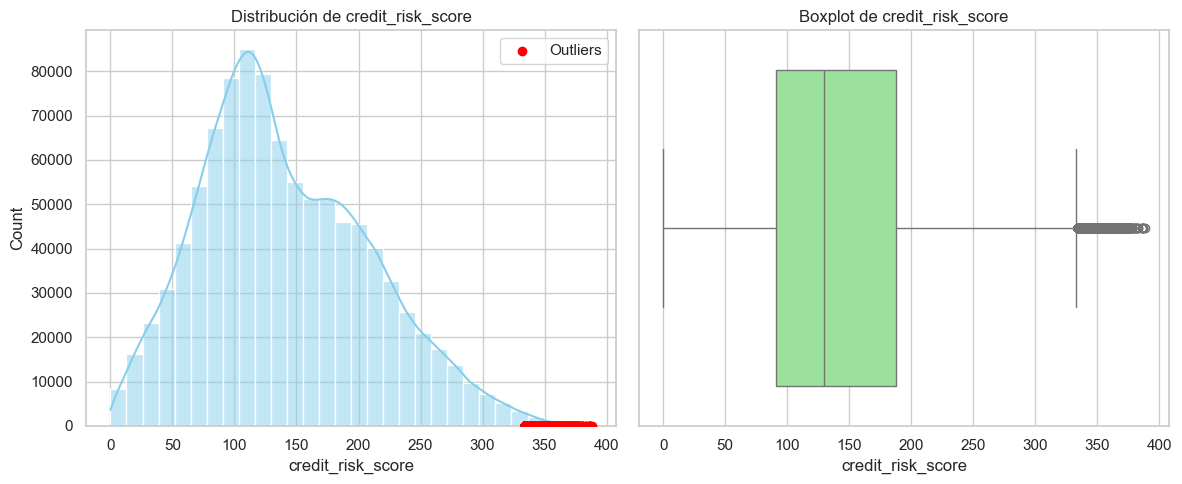

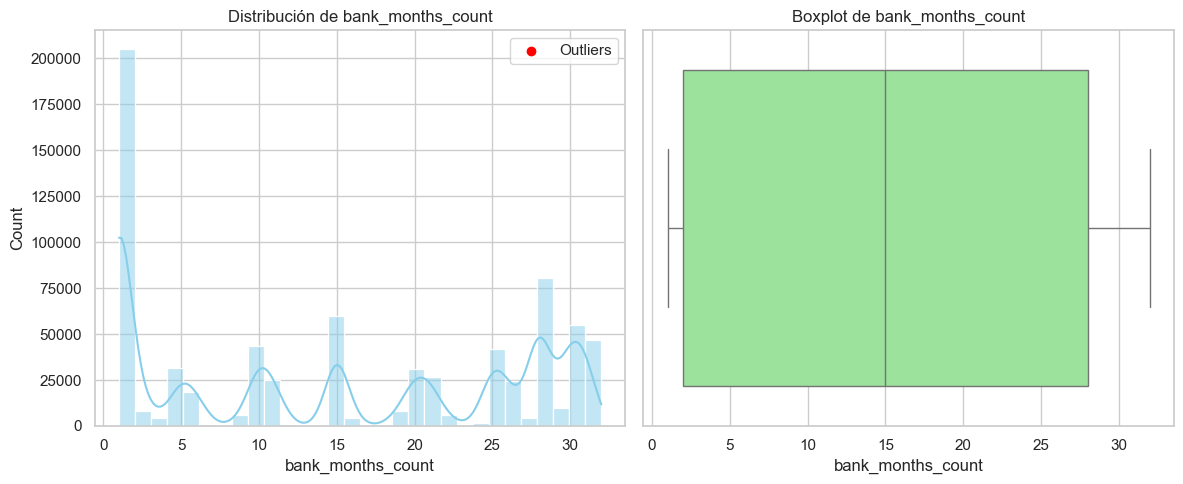

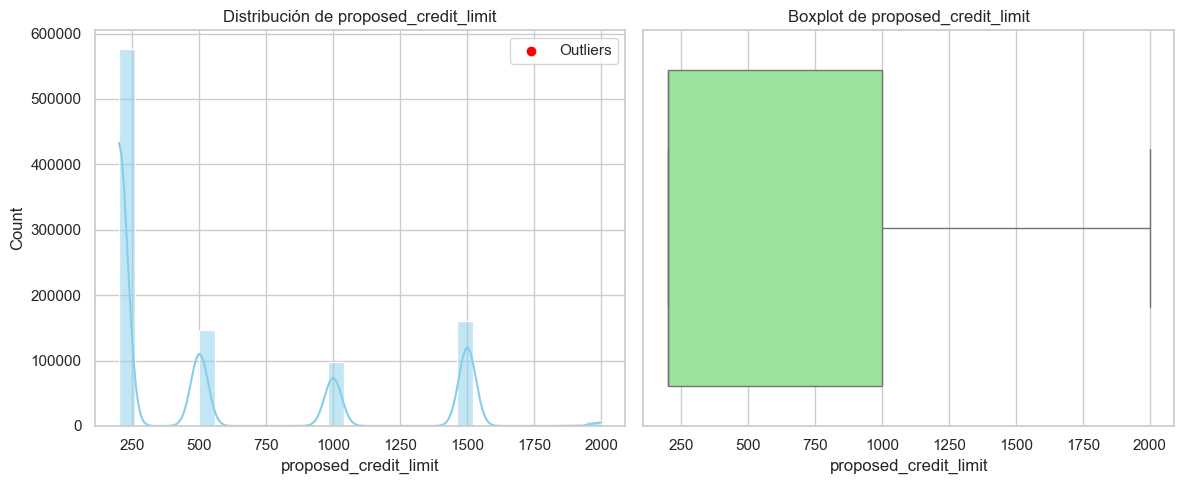

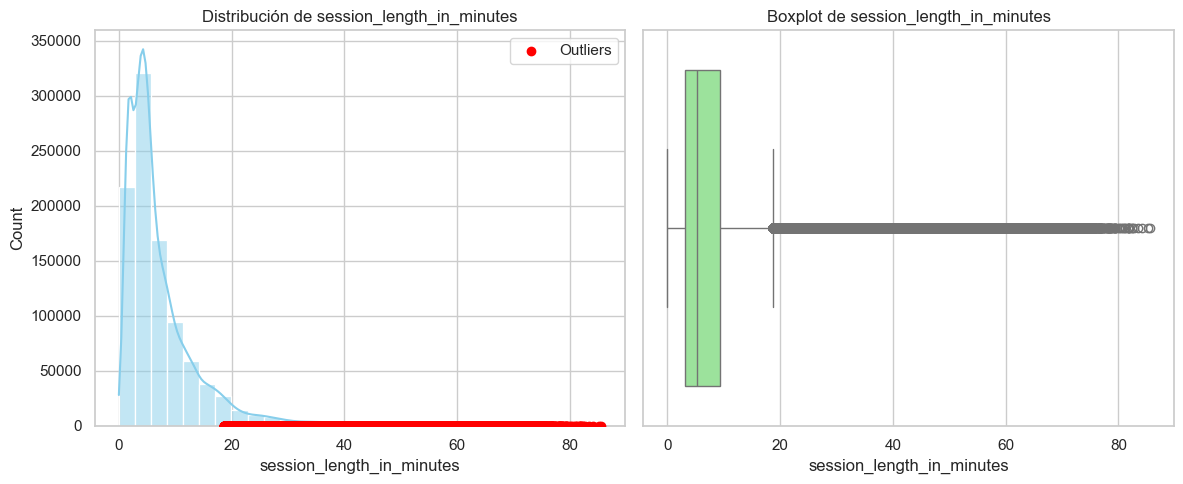

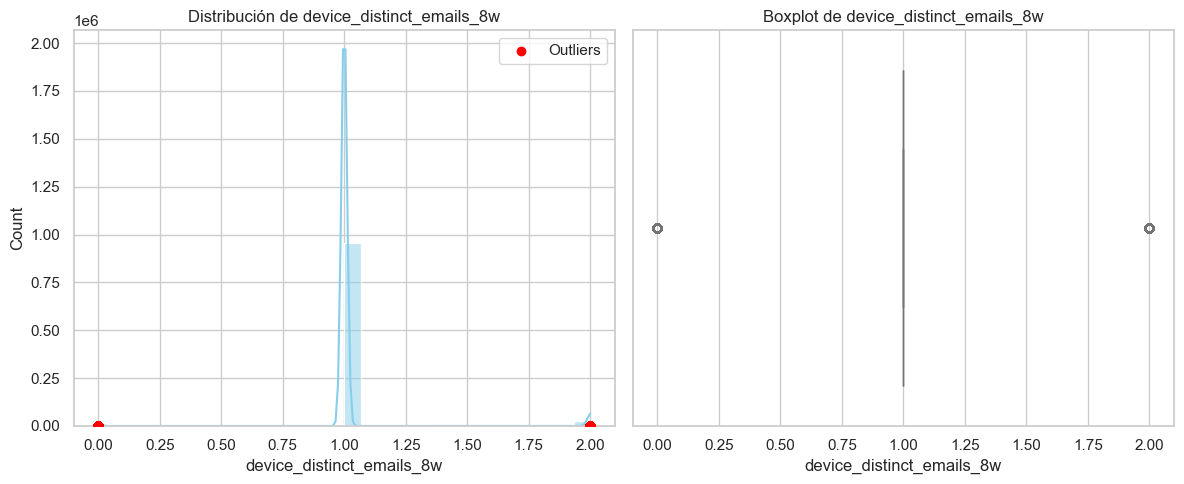

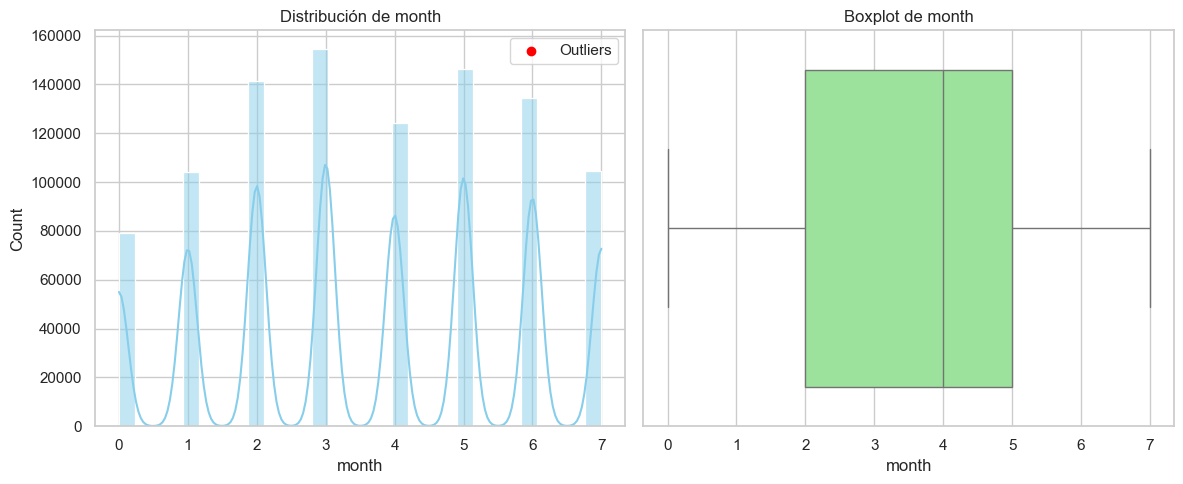

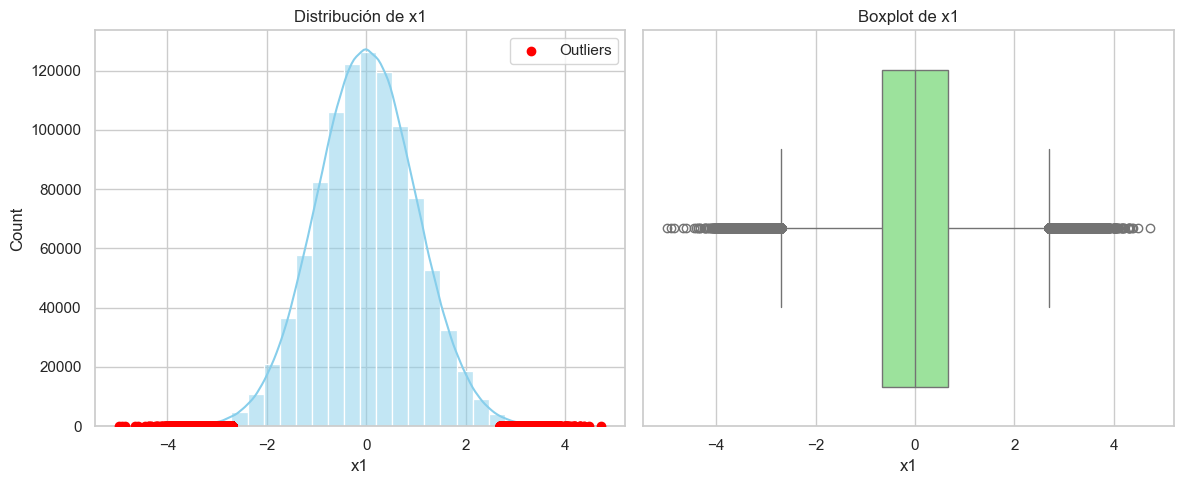

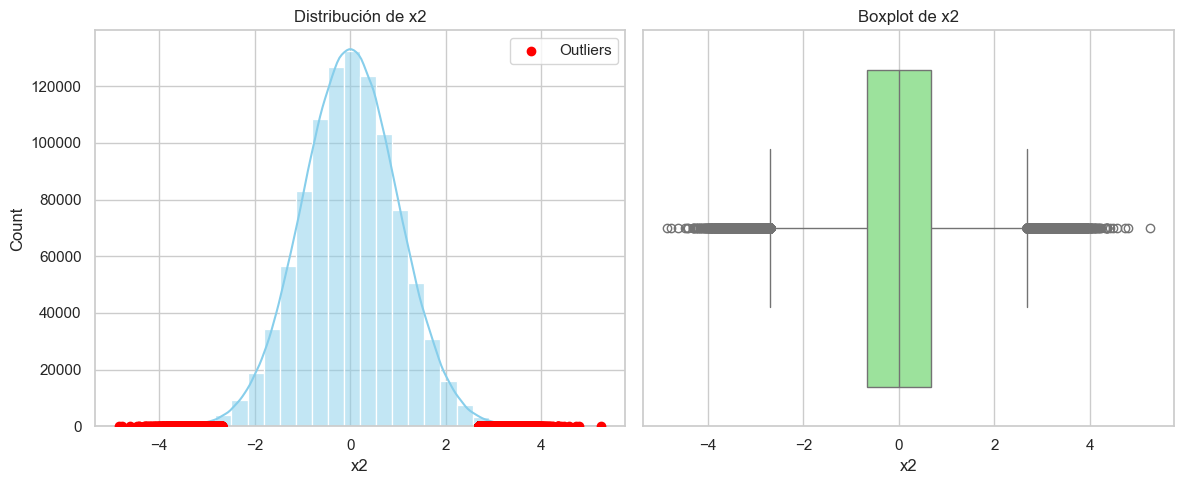

Columnas con outliers de no fraude: ['prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'session_length_in_minutes', 'device_distinct_emails_8w', 'x1', 'x2']


In [45]:
cols_outliers = outliers_detection(viii_no_fraud, cols_to_check3)
print("Columnas con outliers de no fraude:", cols_outliers)

## Transformaciones
* prev_address_months_count
* current_address_months_count
* customer_age
* days_since_request
* intended_balcon_amount
* zip_count_4w
* velocity_6h
* velocity_24h
* bank_branch_count_8w
* date_of_birth_distinct_emails_4w
* credit_risk_score
* session_length_in_minutes
* device_distinct_emails_8w

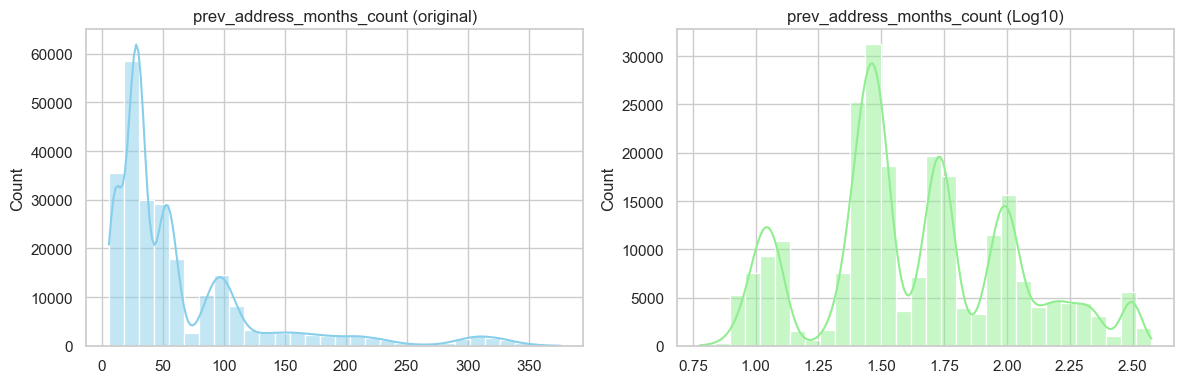

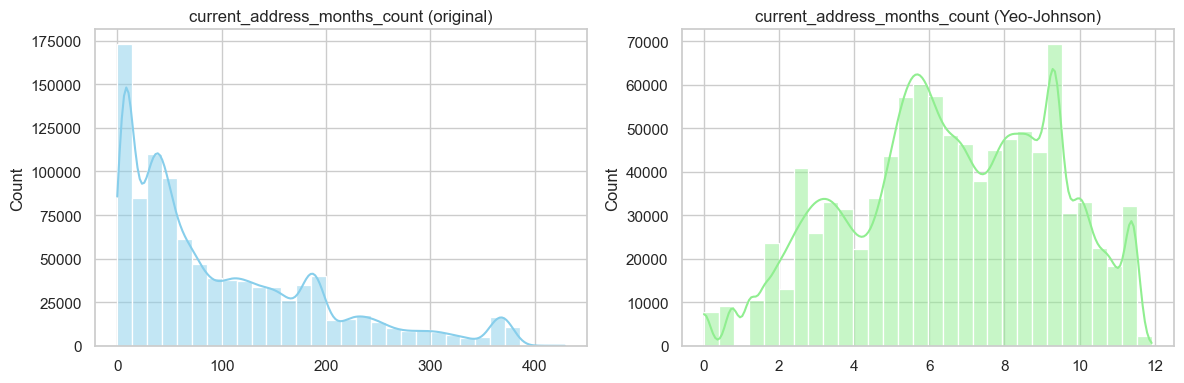

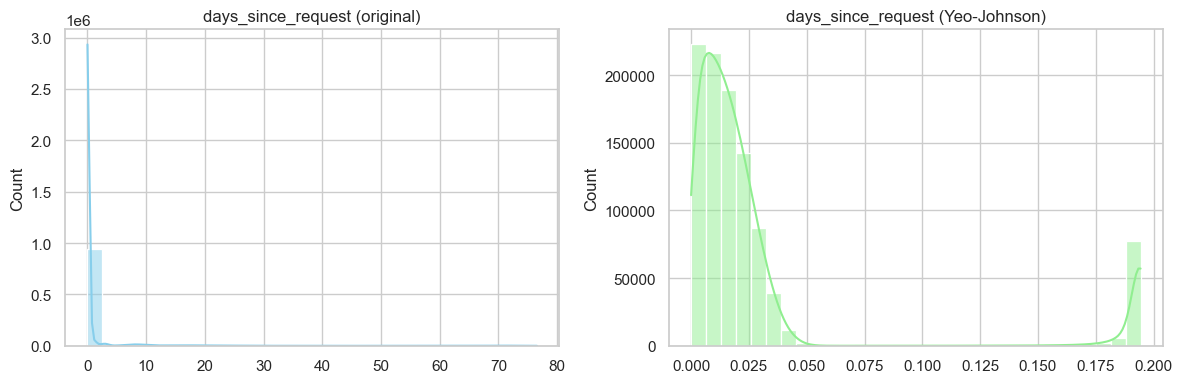

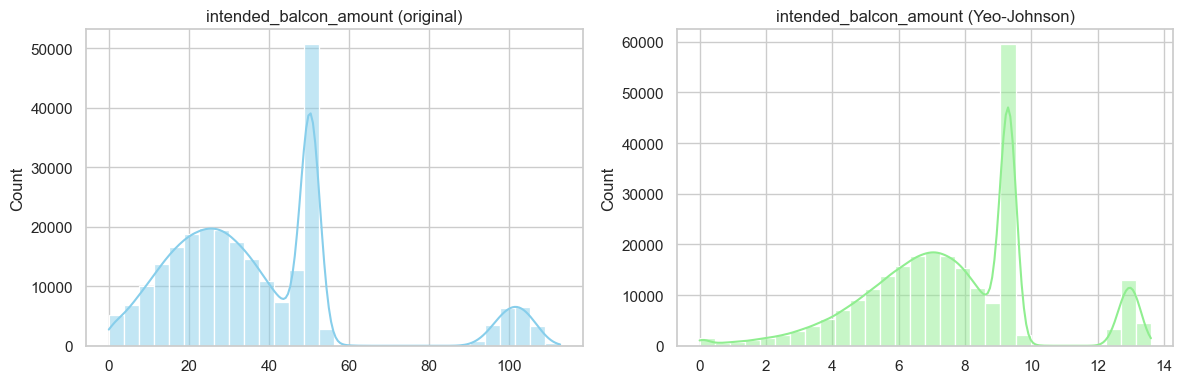

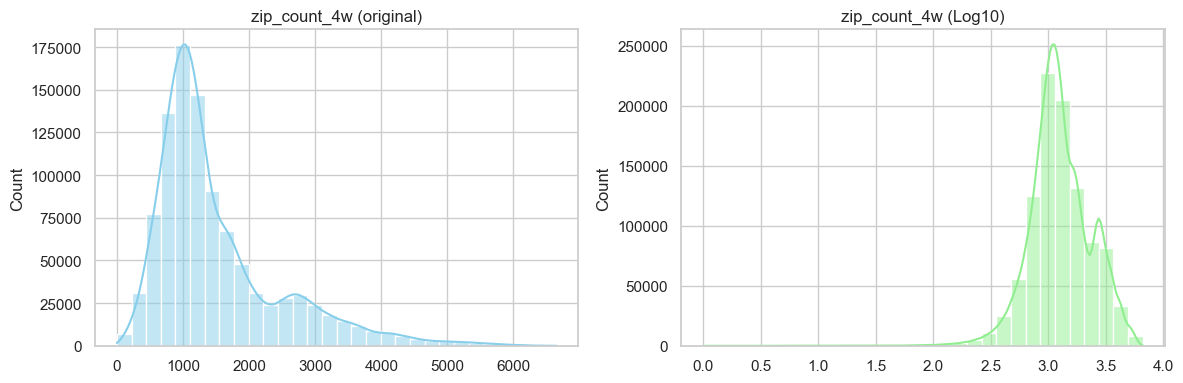

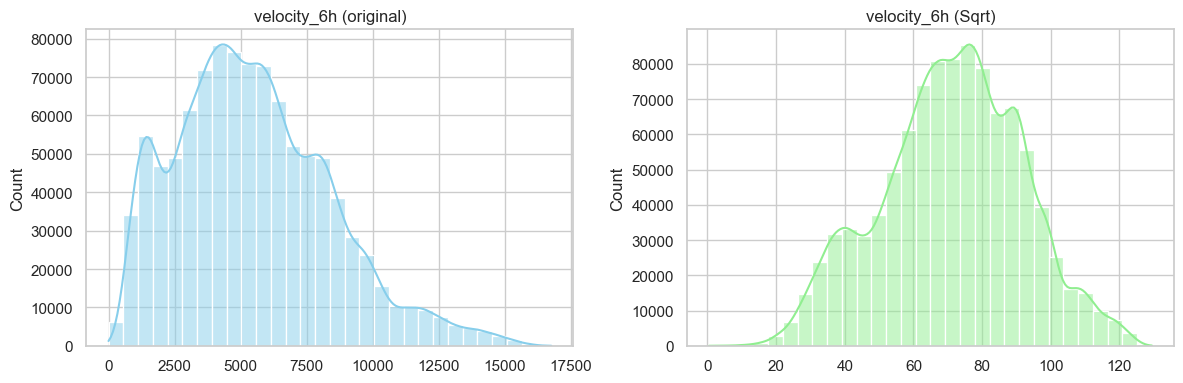

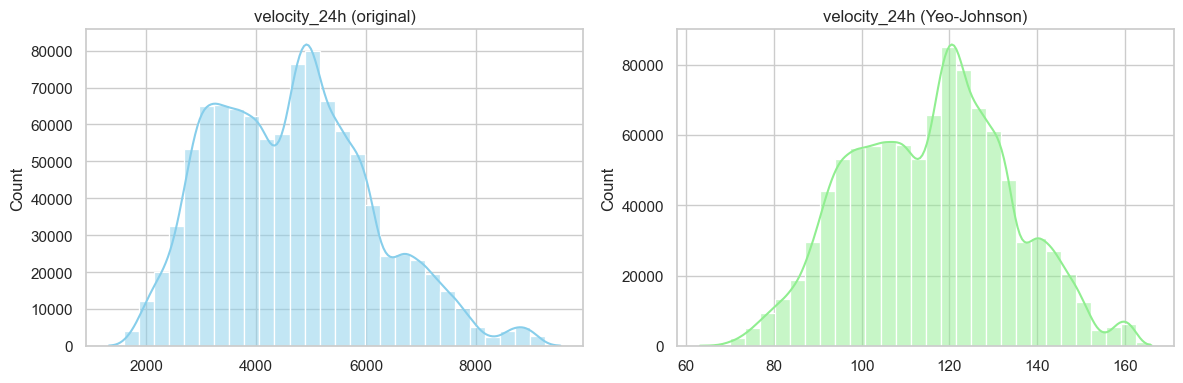

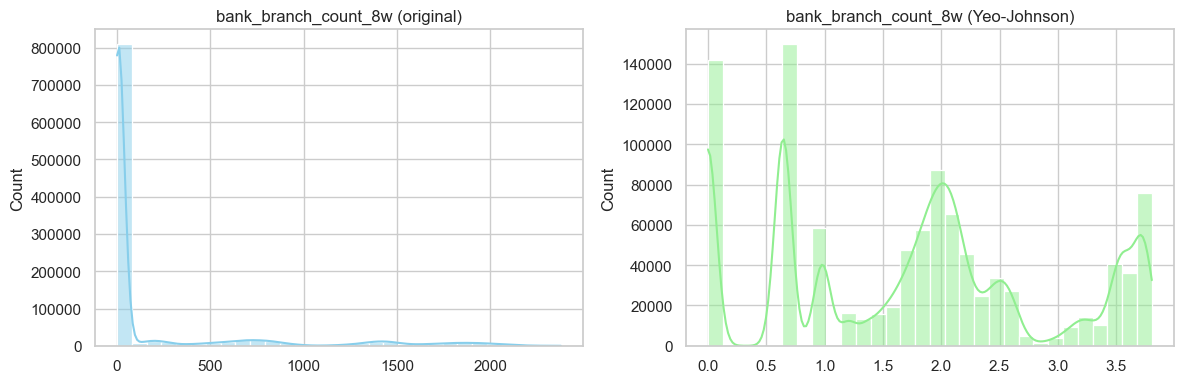

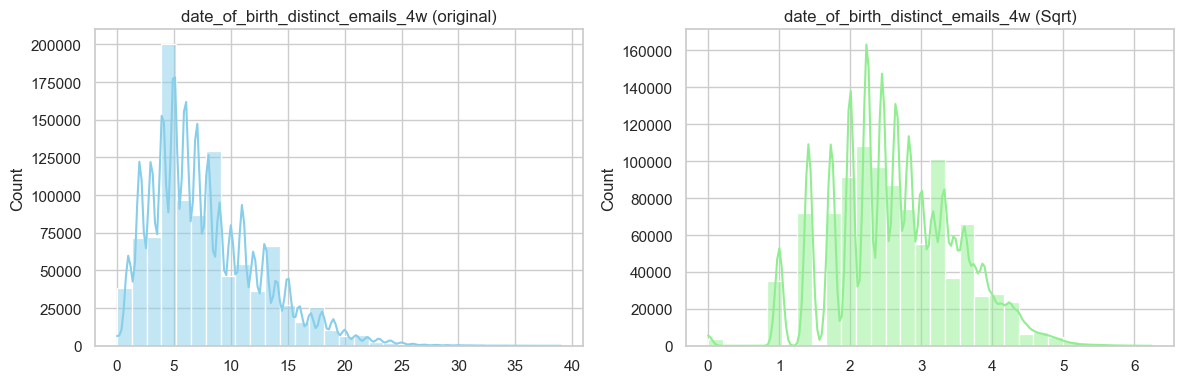

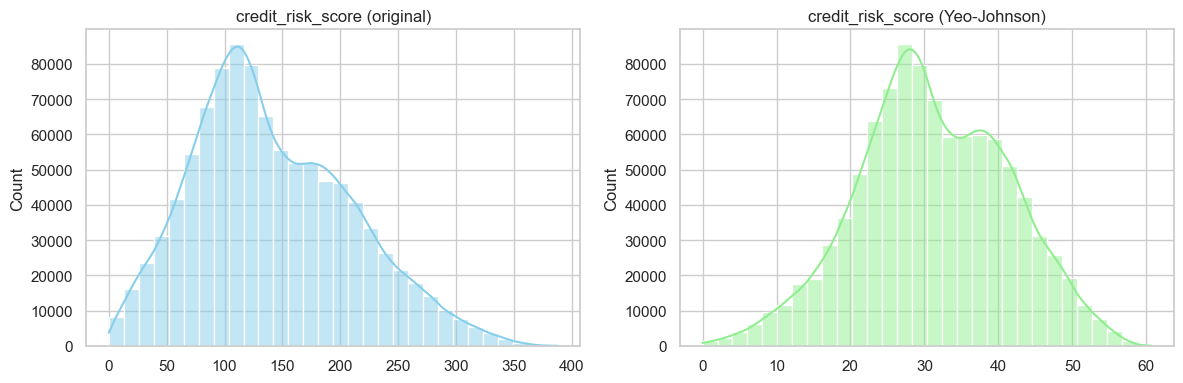

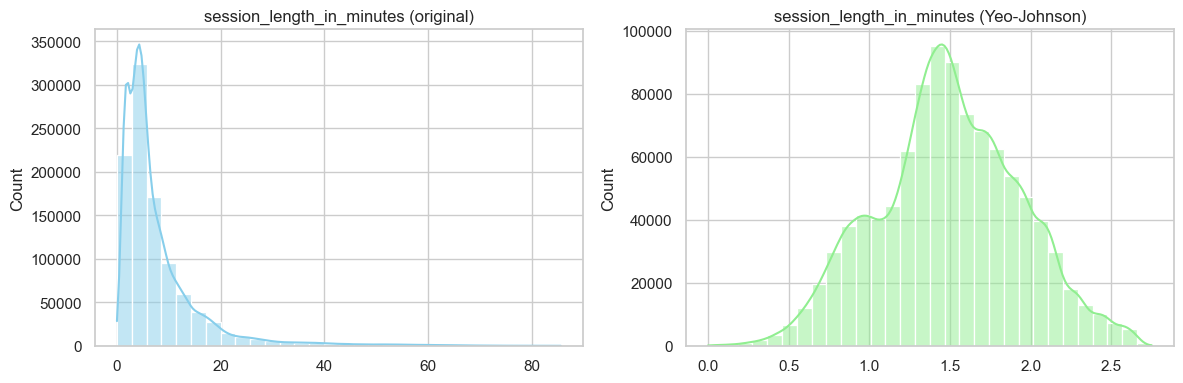

In [46]:
# prev_address_months_count ------> log10
col = "prev_address_months_count"
m = viii[col].notna()
viii.loc[m, col] = log10_transform(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# current_address_months_count ------> yeo-johnson
col = "current_address_months_count"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# days_since_request -------> yeo-johnson
col = "days_since_request"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# intended_balcon_amount ------> yeo-johnson
col = "intended_balcon_amount"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# zip_count_4w -----> log10
col = "zip_count_4w"
m = viii[col].notna()
viii.loc[m, col] = log10_transform(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_6h -----> sqrt
col = "velocity_6h"
m = viii[col].notna()
viii.loc[m, col] = sqrt_transform(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_24h -----> yeo-johnson
col = "velocity_24h"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# bank_branch_count_8w ------> yeo-johnson
col = "bank_branch_count_8w"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# date_of_birth_distinct_emails_4w ------> sqrt
col = "date_of_birth_distinct_emails_4w"
m = viii[col].notna()
viii.loc[m, col] = sqrt_transform(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# credit_risk_score -------> yeo-johnson
col = "credit_risk_score"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

# session_length_in_minutes ------> yeo-johnson
col = "session_length_in_minutes"
m = viii[col].notna()
viii.loc[m, col] = yeo_johnson(col, viii.loc[m, col].to_numpy().reshape(-1, 1))

## Imputar valores NaN

In [47]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Columnas donde 0 = ausencia real (según BAF/Viii.csv)
absence_real = [c for c in ["prev_address_months_count",
                            "bank_months_count",
                            "intended_balcon_amount"]
                if c in viii.columns]

# Crear indicadores *_was_missing solo en numéricas con NaN
cols_with_nan = [c for c in num_cols if viii[c].isna().any()]
for c in cols_with_nan:
    viii[f"{c}_was_missing"] = viii[c].isna().astype("int8")

# Imputación:
# 0 para ausencia real
for c in absence_real:
    viii[c] = viii[c].fillna(0)

# Mediana para el resto de numéricas con NaN
median_cols = [c for c in cols_with_nan if c not in absence_real]
for c in median_cols:
    viii[c] = viii[c].fillna(viii[c].median())

## Codificación de variables categoricas

In [48]:
for col in cat_cols:
    print(viii[col].value_counts())
    print('-'*20)

payment_type
AB    399268
AA    249278
AC    247027
AD    104190
AE       237
Name: count, dtype: int64
--------------------
employment_status
CA    684981
CB    135133
CC     89089
CF     44943
CD     26648
CE     18719
CG       487
Name: count, dtype: int64
--------------------
housing_status
BC    335638
BB    301214
BA    215567
BE    119186
BD     26453
BF      1672
BG       270
Name: count, dtype: int64
--------------------
source
INTERNET    992301
TELEAPP       7699
Name: count, dtype: int64
--------------------
device_os
linux        336891
windows      304464
other        300229
macintosh     50197
x11            8219
Name: count, dtype: int64
--------------------


### ONE-HOT ENCODING para categóricas

In [49]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

cat_cols = ["payment_type","employment_status","housing_status","source","device_os"]
enc = OneHotEncoder(handle_unknown="ignore", dtype=np.uint8)
one_hot = enc.fit_transform(viii[cat_cols])

one_hot_df = pd.DataFrame(
    one_hot.toarray(),  # Convert sparse matrix to dense array
    columns=enc.get_feature_names_out(cat_cols),
    index=viii.index
)

viii_clean = pd.concat([base.drop(columns=cat_cols), one_hot_df], axis=1)

print("Dataset limpio listo:", viii_clean.shape)

Dataset limpio listo: (1000000, 62)


## Descargar

In [50]:
# Exportar a CSV
viii_clean.to_csv("viii_clean.csv", index=False)

# **Limpieza de datos (Variante V)**

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
vv = pd.read_csv("Variant V.csv")
vv.head()

fraud_bool  income  name_email_similarity  prev_address_months_count  \
0           0     0.1               0.244166                        214   
1           0     0.8               0.035690                         -1   
2           0     0.9               0.030506                         -1   
3           0     0.9               0.840711                         -1   
4           0     0.7               0.275118                         -1   

   current_address_months_count  customer_age  days_since_request  \
0                             3            50           20.662310   
1                           242            50            6.134627   
2                            95            50            0.001012   
3                           105            60            0.012292   
4                           374            60            1.081235   

   intended_balcon_amount payment_type  zip_count_4w  ...  foreign_request  \
0               15.930899           AA          1922  ...                0   
1               20.574086           AA          4614  ...                0   
2               -0.591869           AA          1231  ...                0   
3              106.800603           AA          1874  ...                0   
4               -0.365989           AD          5070  ...                0   

     source  session_length_in_minutes  device_os  keep_alive_session  \
0  INTERNET                   8.513914      linux                   1   
1  INTERNET                   4.399087    windows                   1   
2  INTERNET                   6.989680      linux                   0   
3  INTERNET                  50.544274      linux                   0   
4  INTERNET                   4.847442      linux                   1   

  device_distinct_emails_8w  device_fraud_count  month        x1        x2  
0                         1                   0      0 -0.600198 -0.296015  
1                         1                   0      0 -1.406937  2.136468  
2                         1                   0      0 -0.688785  0.686640  
3                         1                   0      0 -0.865885 -2.078178  
4                         1                   0      0 -0.339504 -2.032053  

[5 rows x 34 columns]

In [17]:
vv.shape

(1000000, 34)

In [18]:
print(vv.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [19]:
# Número total de duplicados (filas idénticas en todas las columnas)
print("Duplicados:", vv.duplicated().sum())

Duplicados: 0


In [20]:
vv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

## Conversión de valores nulos

In [21]:
(vv == -1).sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           761730
current_address_months_count          3381
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      397
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   246922
has_other_cards                          0
proposed_cr

In [22]:
# Convertir valores fuera de rango en NaN
for col, (low, high) in ranges.items():
    if col in vv.columns:
        vv.loc[(vv[col] < low) | (vv[col] > high), col] = np.nan

print("Valores fuera de rango reemplazados por NaN")

Valores fuera de rango reemplazados por NaN


In [23]:
# Contar negativos por columna
negativos = (vv[num_cols] < 0).sum()

print(negativos)

NameError: name 'num_cols' is not defined

## Detección y corrección de outliers

In [24]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

# 1. Filtrar solo no-fraude
vv_no_fraud = vv[vv['fraud_bool'] == 0].copy()

# 2. Detectar columnas numéricas directamente en vv_no_fraud
num_cols_nf = [c for c in vv_no_fraud.columns if is_numeric_dtype(vv_no_fraud[c])]

# 3. Quitar binarias (0/1) y target de esa lista
cols_to_check5 = []
for c in num_cols_nf:
    vals = vv_no_fraud[c].dropna().unique()
    if not set(vals).issubset({0, 1}):  # descartar binarias
        cols_to_check5.append(c)

print("Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):")
print(cols_to_check5)

Columnas NUMÉRICAS consideradas (no binarias, solo no-fraude):
['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'bank_months_count', 'proposed_credit_limit', 'session_length_in_minutes', 'device_distinct_emails_8w', 'month', 'x1', 'x2']


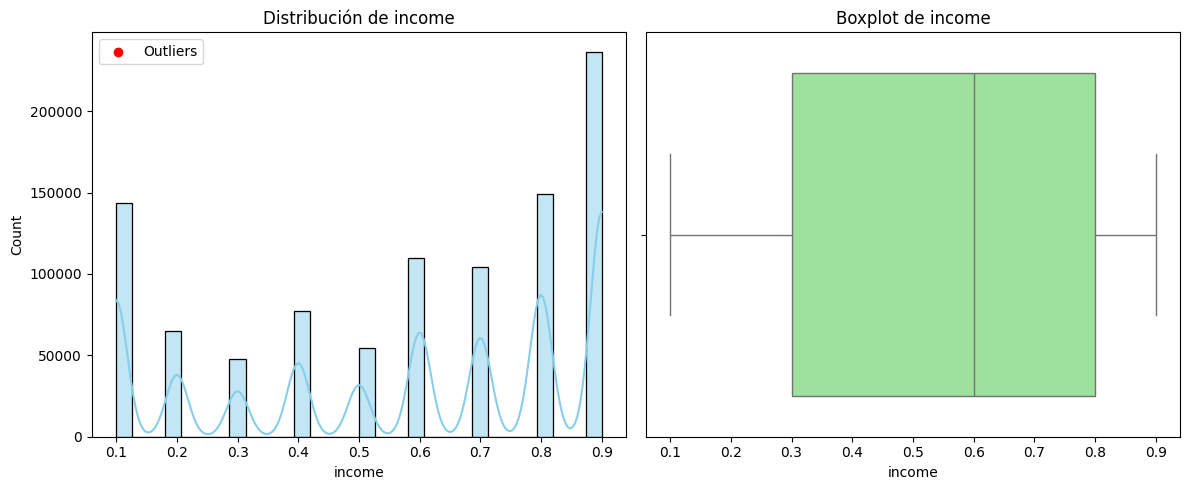

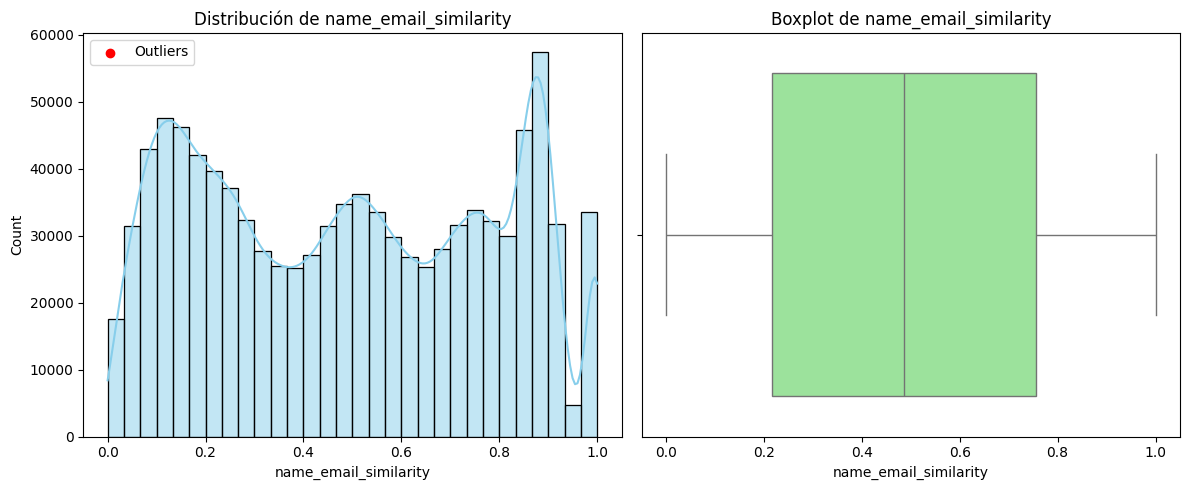

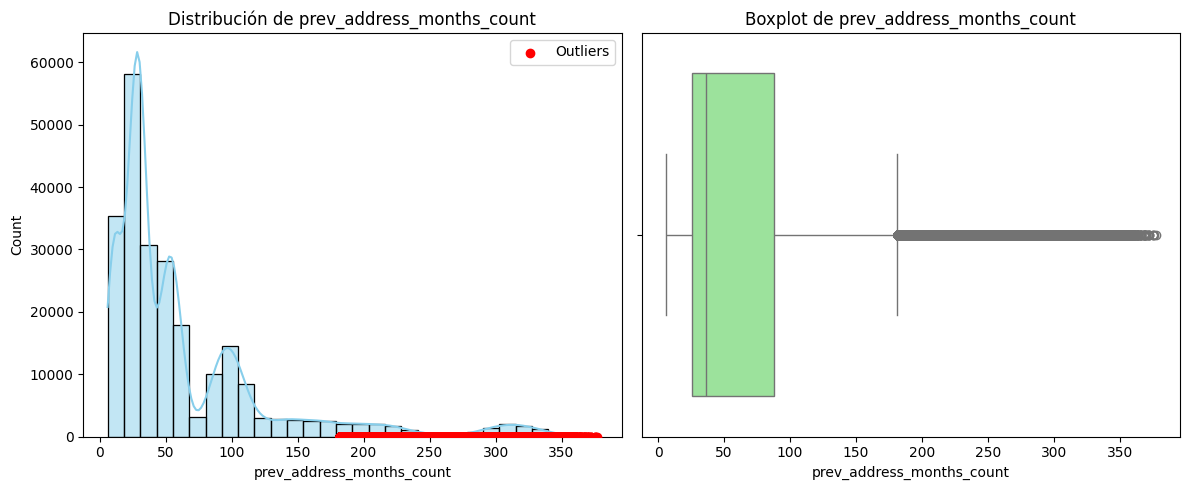

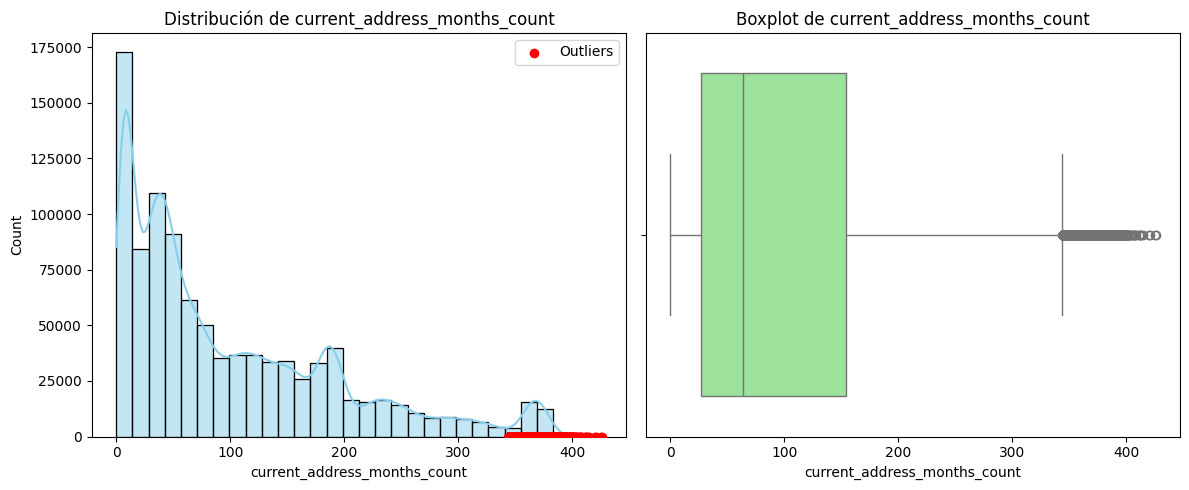

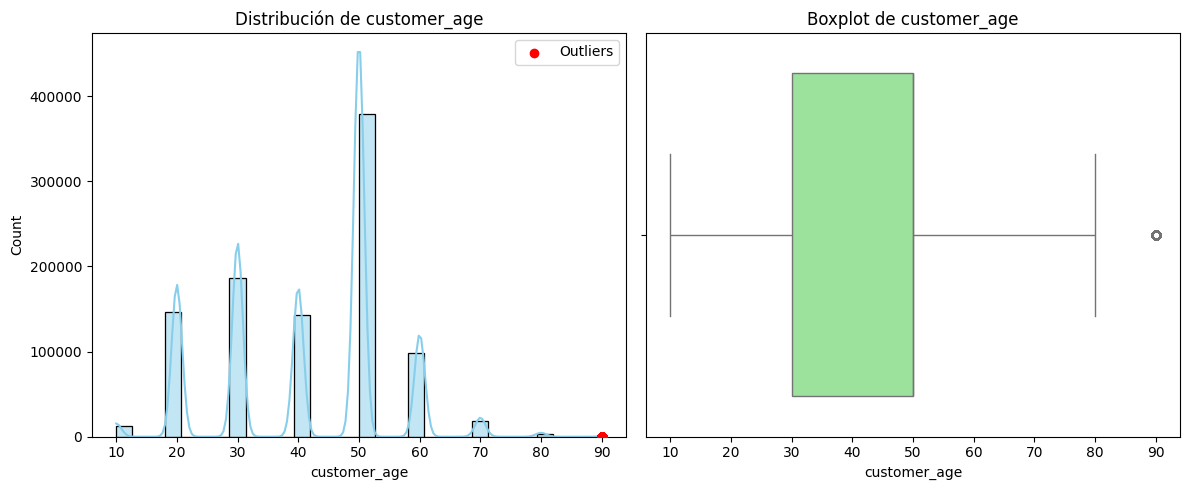

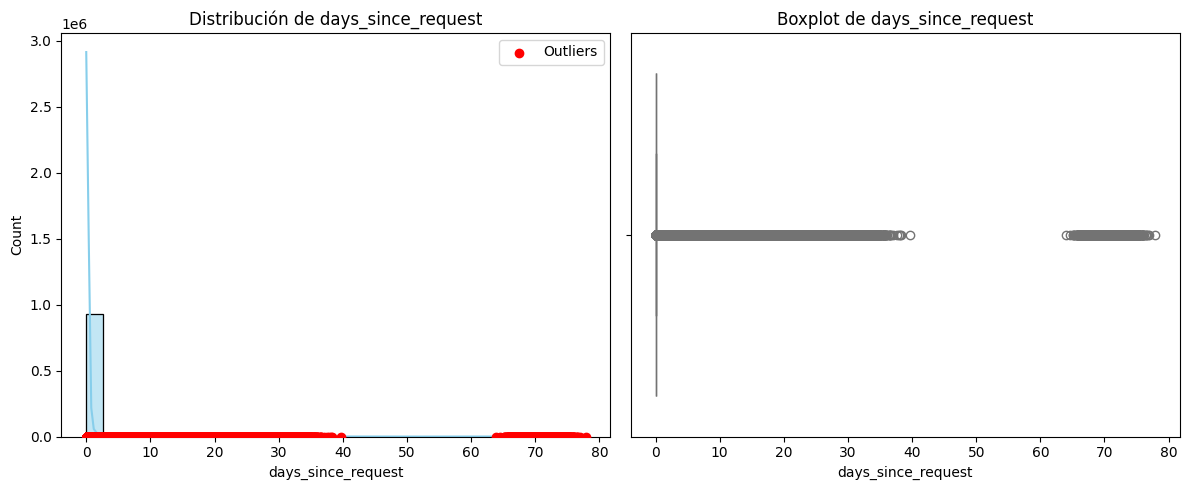

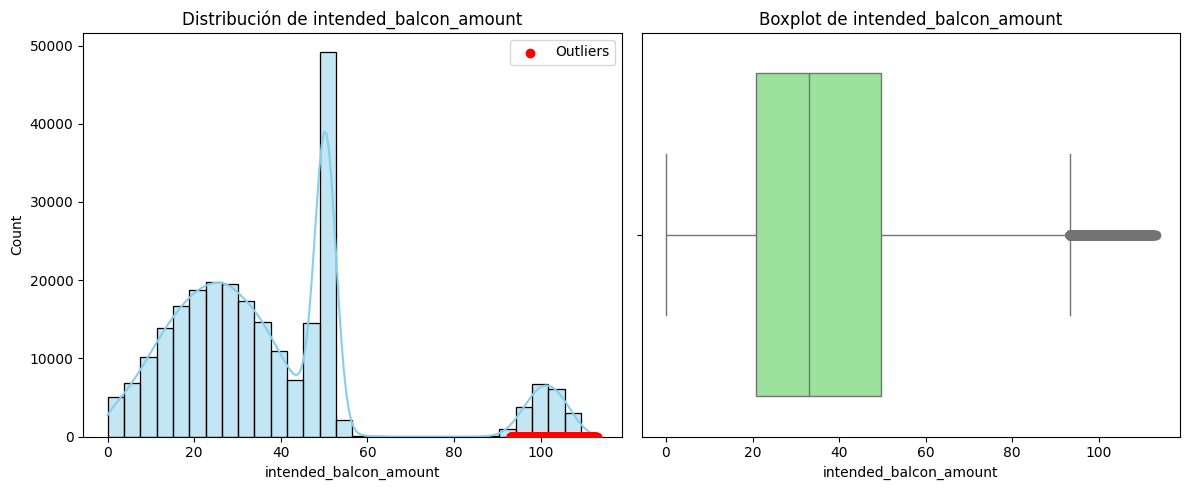

KeyboardInterrupt: 

In [30]:
cols_outliers = outliers_detection(vv_no_fraud, cols_to_check5)
print("Columnas con outliers de no fraude:", cols_outliers)

## Transformaciones

* prev\_address\_months\_count
* current\_address\_months\_count
* days\_since\_request
* intended\_balcon\_amount
* zip\_count\_4w
* velocity\_6h
* velocity\_24h
* velocity\_4w
* bank\_branch\_count\_8w
* date\_of\_birth\_distinct\_emails\_4w
* credit\_risk\_score
* session\_length\_in\_minutes
* device\_distinct\_emails\_8w
* x1
* x2

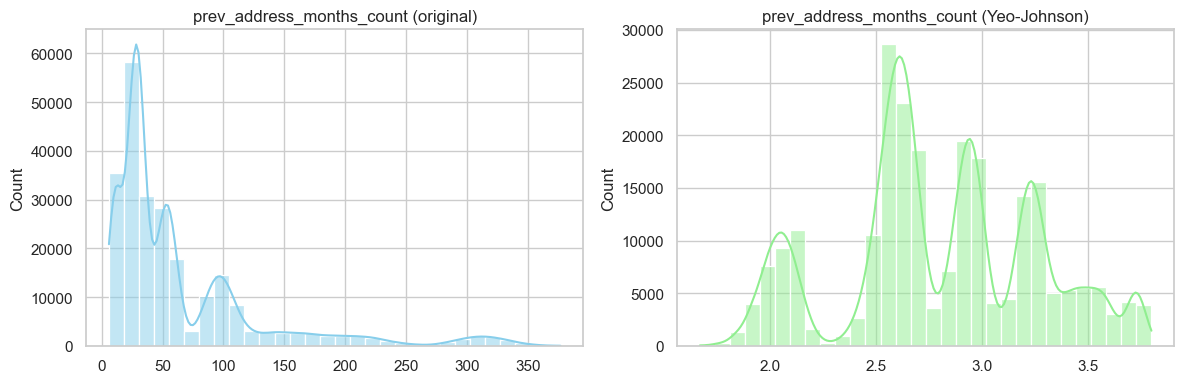

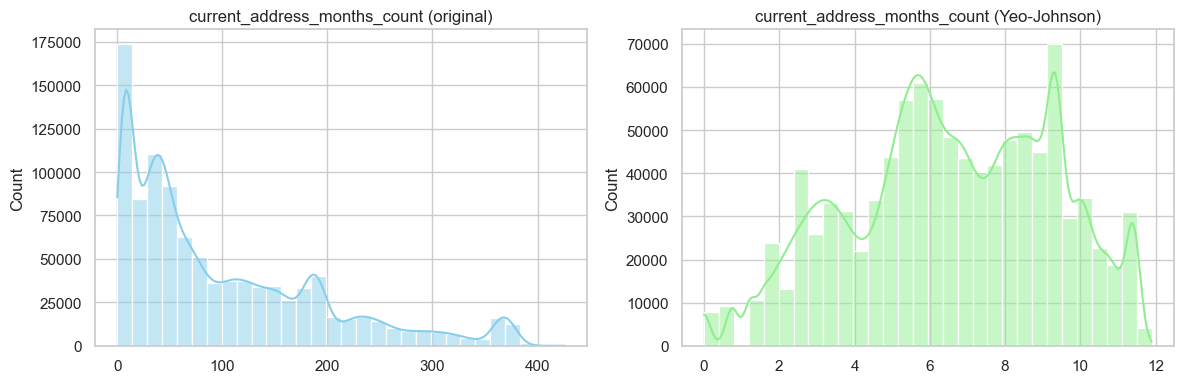

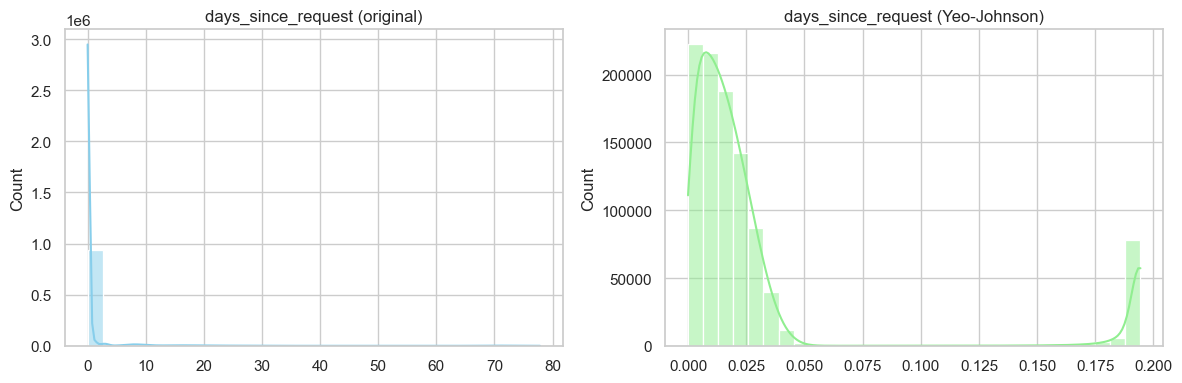

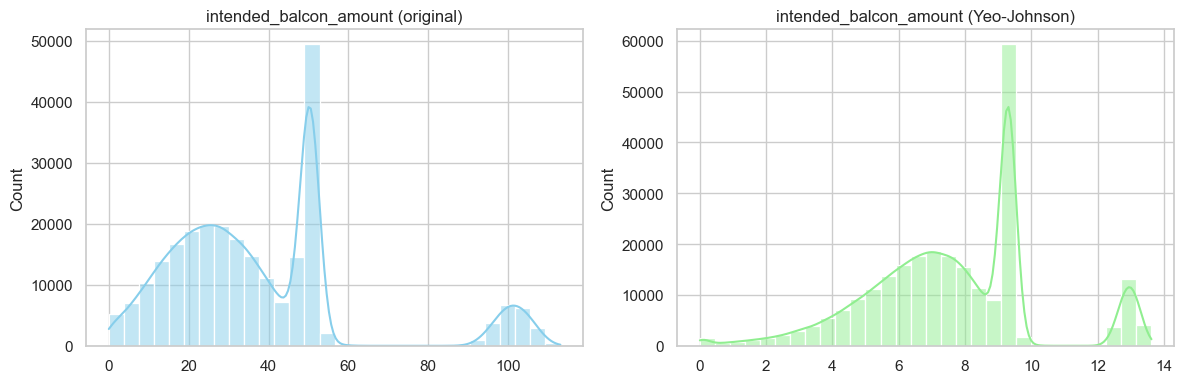

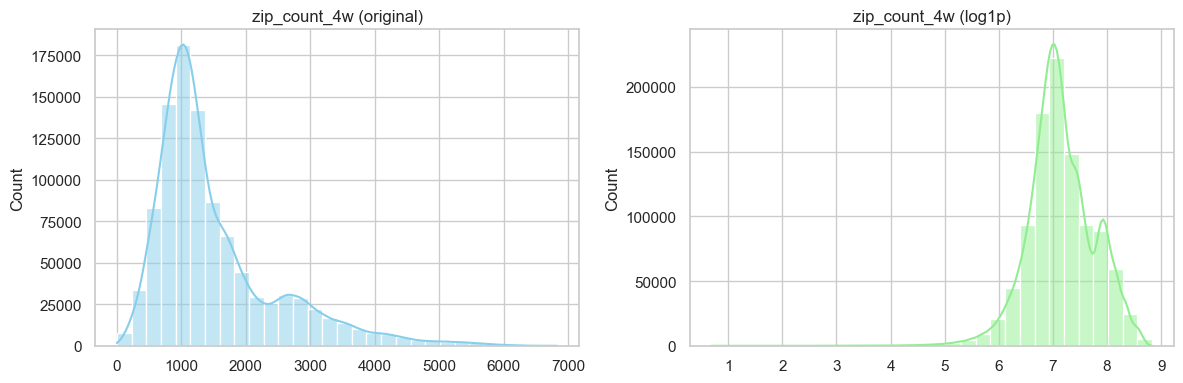

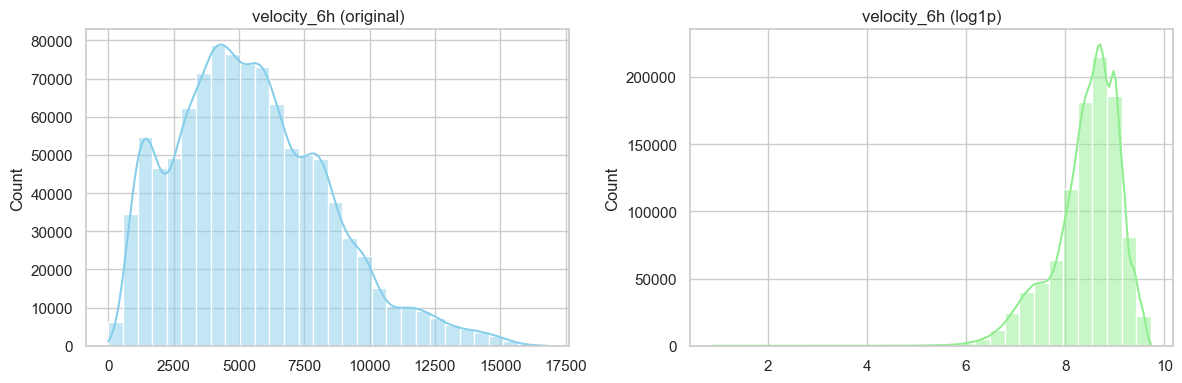

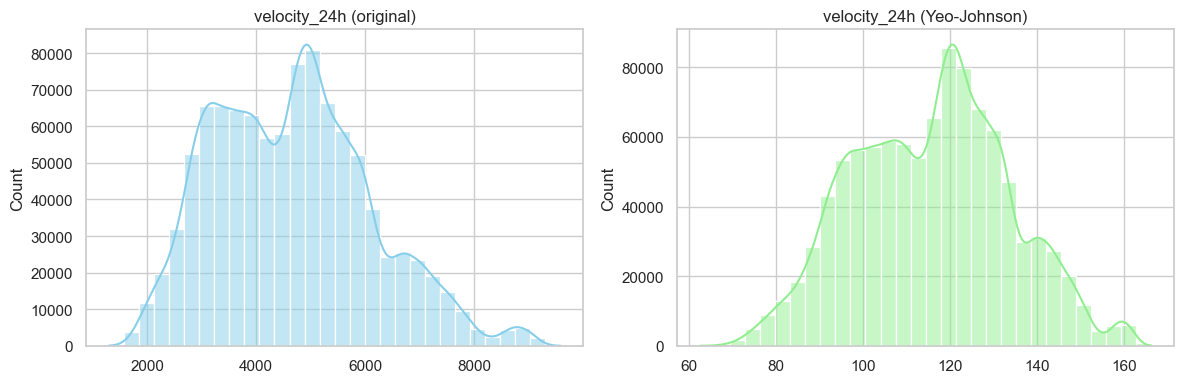

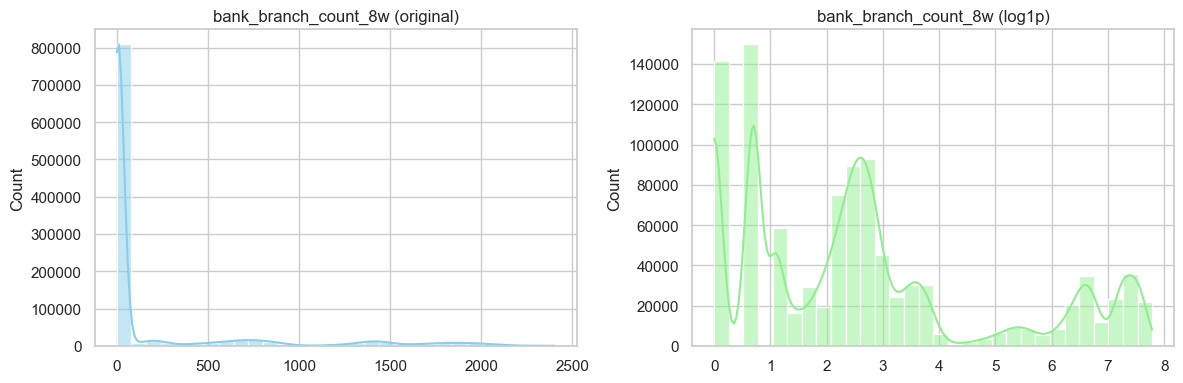

KeyboardInterrupt: 

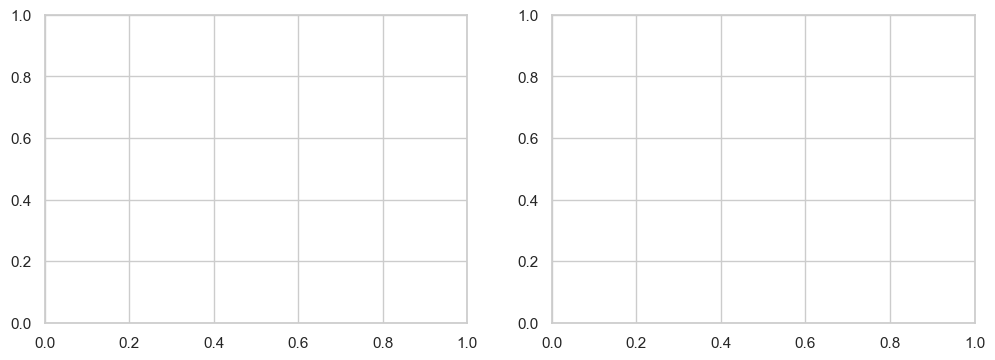

In [ ]:
# prev_address_months_count ------> yeo-johnson
col = "prev_address_months_count"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# current_address_months_count ------> yeo-johnson
col = "current_address_months_count"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# days_since_request -------> yeo-johnson
col = "days_since_request"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# intended_balcon_amount ------> yeo-johnson
col = "intended_balcon_amount"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# zip_count_4w -----> log1p
col = "zip_count_4w"
m = vv[col].notna()
vv.loc[m, col] = log_1p(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_6h -----> log1p
col = "velocity_6h"
m = vv[col].notna()
vv.loc[m, col] = log_1p(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# velocity_24h -----> yeo-johnson
col = "velocity_24h"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# bank_branch_count_8w ------> log1p
col = "bank_branch_count_8w"
m = vv[col].notna()
vv.loc[m, col] = log_1p(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# date_of_birth_distinct_emails_4w ------> yeo-johnson
col = "date_of_birth_distinct_emails_4w"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# credit_risk_score -------> yeo-johnson
col = "credit_risk_score"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

# session_length_in_minutes ------> yeo-johnson
col = "session_length_in_minutes"
m = vv[col].notna()
vv.loc[m, col] = yeo_johnson(col, vv.loc[m, col].to_numpy().reshape(-1, 1))

## Imputar valores NaN

In [ ]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype

# Columnas donde 0 = ausencia real (según BAF/vv.csv)
absence_real = [c for c in ["prev_address_months_count",
                            "bank_months_count",
                            "intended_balcon_amount"]
                if c in vv.columns]

# Crear indicadores *_was_missing solo en numéricas con NaN
cols_with_nan = [c for c in num_cols if vv[c].isna().any()]
for c in cols_with_nan:
    vv[f"{c}_was_missing"] = vv[c].isna().astype("int8")

# Imputación:
# 0 para ausencia real
for c in absence_real:
    vv[c] = vv[c].fillna(0)

# Mediana para el resto de numéricas con NaN
median_cols = [c for c in cols_with_nan if c not in absence_real]
for c in median_cols:
    vv[c] = vv[c].fillna(vv[c].median())

## Codificacion de variables categoricas

In [ ]:
for col in cat_cols:
    print(vv[col].value_counts())
    print('-'*20)

payment_type
AB    399073
AA    249581
AC    246596
AD    104489
AE       261
Name: count, dtype: int64
--------------------
employment_status
CA    685037
CB    134222
CC     89437
CF     45225
CD     26963
CE     18653
CG       463
Name: count, dtype: int64
--------------------
housing_status
BC    336096
BB    301948
BA    214920
BE    118602
BD     26533
BF      1664
BG       237
Name: count, dtype: int64
--------------------
source
INTERNET    992330
TELEAPP       7670
Name: count, dtype: int64
--------------------
device_os
linux        337150
windows      304492
other        299948
macintosh     50226
x11            8184
Name: count, dtype: int64
--------------------


### ONE HOT ENCODING para categoricas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from pandas.api.types import is_numeric_dtype

cat_cols = ["payment_type","employment_status","housing_status","source","device_os"]
enc = OneHotEncoder(handle_unknown="ignore", dtype=np.uint8)
one_hot = enc.fit_transform(vv[cat_cols])

one_hot_df = pd.DataFrame(
    one_hot.toarray(),  # Convert sparse matrix to dense array
    columns=enc.get_feature_names_out(cat_cols),
    index=vv.index
)

vv_clean = pd.concat([vv_no_fraud.drop(columns=cat_cols), one_hot_df], axis=1)

print("Dataset limpio listo:", vv_clean.shape)

NameError: name 'vv_no_fraud' is not defined

## Descargar

In [ ]:
# Exportar a CSV
vv_clean.to_csv("vv_clean.csv", index=False)